In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno # library to visualize missing values
import warnings
from sklearn.impute import SimpleImputer


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

import pickle

warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns',None) # show all the colums if it's more than 15 columns
pd.set_option('display.width', 1000)

# application_df <a class="anchor" id="app_df"></a>


## Understanding Data

In [2]:
df = pd.read_csv('application_data.csv')


print('application_df shape: ', df.shape)

application_df shape:  (307511, 122)


In [3]:
df.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [5]:
df.rename(columns={'TARGET': 'DEFAULTER'},inplace=True)

# Data Cleaning  <a class="anchor" id="Data_Cleaning"></a>

## NULL Values

<AxesSubplot:>

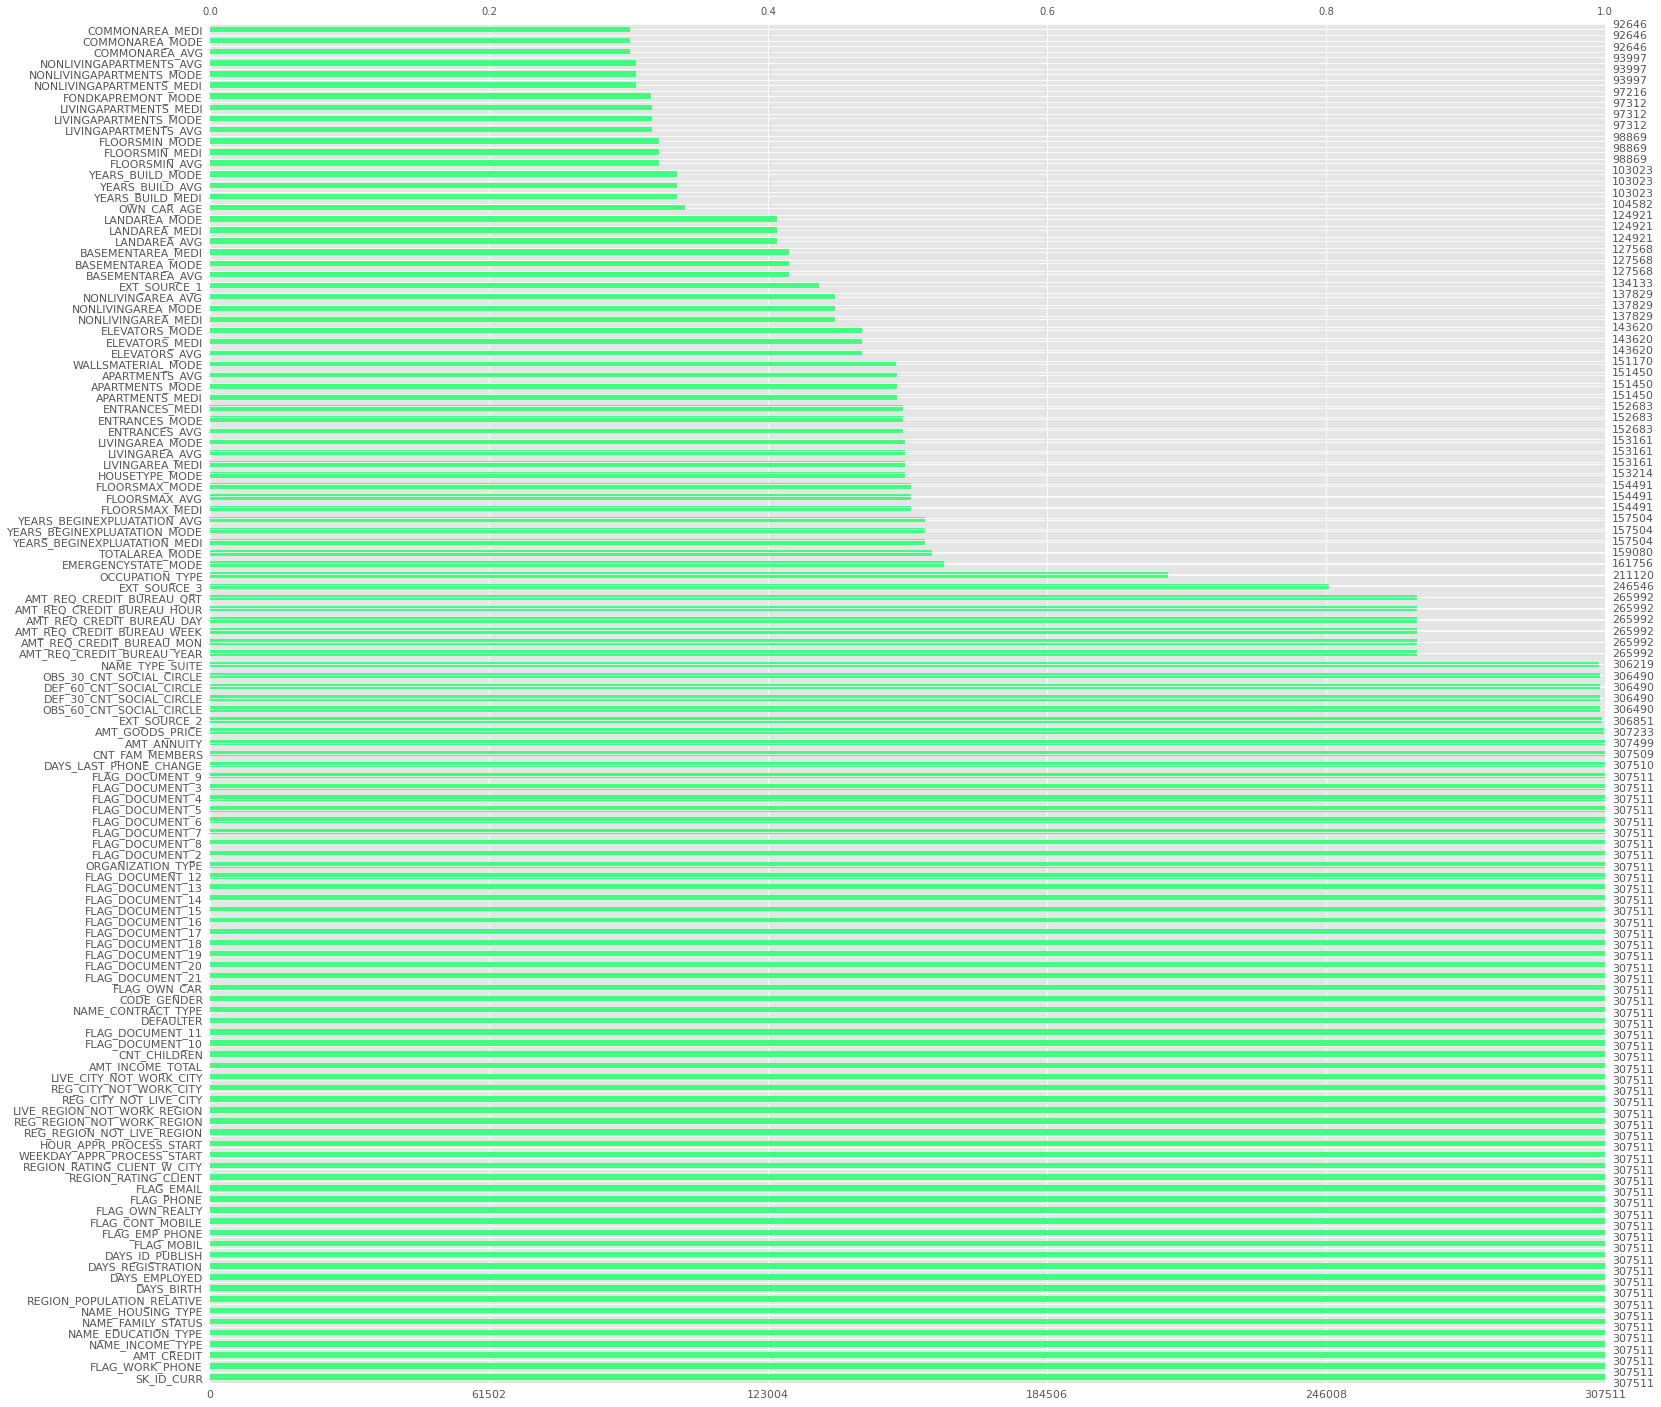

In [6]:
msno.bar(df,sort= 'descending',color=(0.25,1,0.5),figsize= (25,25),fontsize =11)

In [7]:

app_null_vals = ((df.isna().sum()/len(df))*100).sort_values(ascending=False)
app_null_vals

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

In [8]:


df.drop(df.columns[round(((df.isna().sum()/len(df))*100))>45]
                    ,axis=1,inplace=True)



In [9]:
app_null_vals = round(((df.isna().sum()/len(df))*100).sort_values(ascending=False),3)
app_null_vals

OCCUPATION_TYPE                31.346
EXT_SOURCE_3                   19.825
AMT_REQ_CREDIT_BUREAU_YEAR     13.502
AMT_REQ_CREDIT_BUREAU_QRT      13.502
AMT_REQ_CREDIT_BUREAU_MON      13.502
                                ...  
REG_REGION_NOT_LIVE_REGION      0.000
REG_REGION_NOT_WORK_REGION      0.000
LIVE_REGION_NOT_WORK_REGION     0.000
DEFAULTER                       0.000
REG_CITY_NOT_LIVE_CITY          0.000
Length: 73, dtype: float64

In [10]:

# for loop to check if these columns has 'XNA' or 'XAP' in them and apend them to an empty list
cols_with_XNA = []
for col in df.columns:
    if ('XNA' in df[col].unique()) or ('XAP' in df[col].unique()):
        
        cols_with_XNA.append(col)
cols_with_XNA 

['CODE_GENDER', 'ORGANIZATION_TYPE']

In [11]:
    

for col in cols_with_XNA:
    df[col].replace({
            'XNA': np.nan,
            'XAP': np.nan
        },inplace=True)

In [12]:
((df[cols_with_XNA].isnull().sum())/len(df))*100

CODE_GENDER           0.001301
ORGANIZATION_TYPE    18.007161
dtype: float64

In [13]:
(((df.isnull().sum())/len(df))*100).sort_values(ascending =  False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
ORGANIZATION_TYPE              18.007161
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
                                 ...    
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
DEFAULTER                       0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
Length: 73, dtype: float64

In [14]:

na_cols = ['DEF_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',   
           'AMT_GOODS_PRICE','AMT_ANNUITY','CNT_FAM_MEMBERS']

In [15]:
ext = df.columns[df.columns.str.contains(pat = 'EXT')]

# ext reresource 2,3  Normalized score from external data source
df.drop(ext,axis=1, inplace=True)

In this doc_df dataframe we will drop columns with the greatest *zero* vaues


In [16]:


doc = df.columns[df.columns.str.contains(pat = 'DOCUMENT')]
doc_df = df[doc]

In [17]:


# FLAG_DOCUMENT columns: Did client provide document 
doc_df.apply(pd.Series.value_counts)


,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,307498,89171,307486,302863,280433,307452,282487,306313,307504,306308,307509,306427,306608,307139,304458,307429,305011,307328,307355,307408
1,13,218340,25,4648,27078,59,25024,1198,7,1203,2,1084,903,372,3053,82,2500,183,156,103


In [18]:
df.drop([
    'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
    'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 
    'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
    'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
    axis=1, 
    inplace=True)

## Filling Null Values

In [19]:
categorical_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='median')

In [20]:
df['OCCUPATION_TYPE'] = categorical_imputer.fit_transform(df[['OCCUPATION_TYPE']])

df['NAME_TYPE_SUITE'] = categorical_imputer.fit_transform(df[['NAME_TYPE_SUITE']])

In [21]:
df[cols_with_XNA] = categorical_imputer.fit_transform(df[cols_with_XNA])


In [22]:
df[na_cols] = num_imputer.fit_transform(df[na_cols])

In [23]:
# OBS_30_CNT_SOCIAL_CIRCLE: How many observation of client's social surroundings with observable 30 DPD (days past due) default

df.drop(['DEF_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
                     'OBS_60_CNT_SOCIAL_CIRCLE'], axis = 1, inplace=True)

In [24]:
df.reset_index(inplace= True)

In [25]:
df.drop('index', axis = 1, inplace=True)

In [26]:
df[(df['AMT_ANNUITY'] == 0) | (df['AMT_CREDIT'] == 0) | (df['AMT_GOODS_PRICE'] == 0)| (df['AMT_INCOME_TOTAL'] == 0)]

,SK_ID_CURR,DEFAULTER,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [27]:
df[(df['AMT_ANNUITY'] == 0) | (df['AMT_CREDIT'] == 0) |
              (df['AMT_GOODS_PRICE'] == 0)| (df['AMT_INCOME_TOTAL'] == 0)]

,SK_ID_CURR,DEFAULTER,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [28]:
na_cols = (df.isna().sum().sort_values(ascending= False) > 0).head(7).index.tolist()

In [29]:
df[na_cols] = num_imputer.fit_transform(df[na_cols])

# Feature Engineering 

## Years/Months Extractions 

In [30]:
days_cols = df.columns[df.columns.str.contains(pat = 'DAYS')]

for col in days_cols:
    df[col] = np.abs(df[col])

In [31]:
for col in days_cols:
    print(col)
    print((df[col]<0).values.any())

DAYS_BIRTH
False
DAYS_EMPLOYED
False
DAYS_REGISTRATION
False
DAYS_ID_PUBLISH
False
DAYS_LAST_PHONE_CHANGE
False


In [32]:
#convert days to months
df[days_cols] = df[days_cols]//30

In [33]:
df['DAYS_BIRTH']//12


0         26
1         46
2         52
3         52
4         55
          ..
307506    25
307507    57
307508    41
307509    33
307510    46
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [34]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH']//12

df.rename(columns={'DAYS_BIRTH': 'AGE'},inplace=True)

In [35]:
df.rename(
    columns={
        'DAYS_EMPLOYED': 'MONTHS_EMPLOYED',
        'DAYS_REGISTRATION': 'MONTHS_REGISTRATION',
        'DAYS_ID_PUBLISH' : 'MONTHS_ID_PUBLISH',
        'DAYS_LAST_PHONE_CHANGE': 'MONTHS_LAST_PHONE_CHANGE'
        
    },
    inplace=True
    )

In [36]:
def yrs_employed(month):
    year = round(month//12, 1)
    if month < 12:
        return month/100
    else:
        return year

In [37]:
df['YRS_EMPLOYED'] = df['MONTHS_EMPLOYED'].apply(yrs_employed)
df.drop('MONTHS_EMPLOYED', axis = 1, inplace = True)

In [38]:
df['YRS_EMPLOYED']

0            1.00
1            3.00
2            0.07
3            8.00
4            8.00
           ...   
307506       0.07
307507    1014.00
307508      22.00
307509      13.00
307510       3.00
Name: YRS_EMPLOYED, Length: 307511, dtype: float64

In [39]:
max(df['YRS_EMPLOYED'])

1014.0

## Continuous  Columns Extractions

In [40]:
df.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'], dtype='object')

In [41]:
df[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START']].head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START
0,202500.0,406597.5,24700.5,351000.0,10
1,270000.0,1293502.5,35698.5,1129500.0,11
2,67500.0,135000.0,6750.0,135000.0,9
3,135000.0,312682.5,29686.5,297000.0,17
4,121500.0,513000.0,21865.5,513000.0,11


In [42]:
for i in ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']:
    print(i)
    print (f'min: {min(df[i])}\nmax: {max(df[i])}')
    print("_"*15)

AMT_INCOME_TOTAL
min: 25650.0
max: 117000000.0
_______________
AMT_CREDIT
min: 45000.0
max: 4050000.0
_______________
AMT_ANNUITY
min: 1615.5
max: 258025.5
_______________
AMT_GOODS_PRICE
min: 40500.0
max: 4050000.0
_______________


In [43]:
def annuity_amount_categories(amount):
    
    if amount in range(0,5000):
        return 'V.low'
    elif amount in range(5000,15000):
        return 'low'
    elif amount in range(15000,30000):
        return 'High'
    else:
        return 'V.high'

In [44]:
def amount_categories(amount):
    
    
    if amount in range(0,50000):
        return 'V.low'
    elif amount in range(50000,100000):
        return 'Low'
    elif amount in range(100000,300000):
        return 'Medium'
    elif amount in range(300000,500000):
        return 'High'
    else:
        return 'V.high'

In [45]:
df[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']] = df[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']].astype(int)

In [46]:
df['INCOME_TOTAL_CAT'] = df['AMT_INCOME_TOTAL'].apply(amount_categories)


In [47]:
df['CREDIT_CAT'] = df['AMT_CREDIT'].apply(amount_categories)

In [48]:
df['GOODS_PRICE_CAT'] = df['AMT_GOODS_PRICE'].apply(amount_categories)

In [49]:
df['ANNUITY_CAT'] = df['AMT_ANNUITY'].apply(annuity_amount_categories)

In [50]:
def days_part(x):
    
    if x in range(5,12):
        return 'Morning'
    
    elif x in range(12,17):
        return 'Afternoon'
    
    elif x in range(17, 21):
        return 'Evening'
    else:
        return 'Night'

In [51]:
df['PERIOD_APPR_PROCESS_START'] = df['HOUR_APPR_PROCESS_START'].apply(days_part)
df.drop('HOUR_APPR_PROCESS_START', axis = 1, inplace = True)

In [52]:
df[['AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_YEAR']] = df[['AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_YEAR']].astype('int')

# Outliers Checking

In [53]:
check_outliers = [
    'AMT_INCOME_TOTAL',               
    'AMT_CREDIT',                     
    'AMT_ANNUITY' ,                   
    'AMT_GOODS_PRICE',
    'CNT_CHILDREN',                   
    'AGE',
    'CNT_FAM_MEMBERS', 
    'REGION_POPULATION_RELATIVE'
]

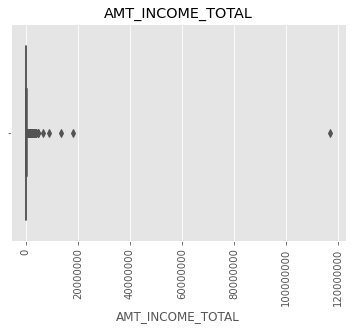

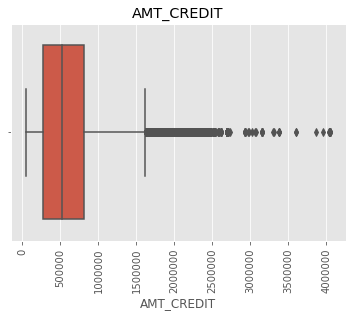

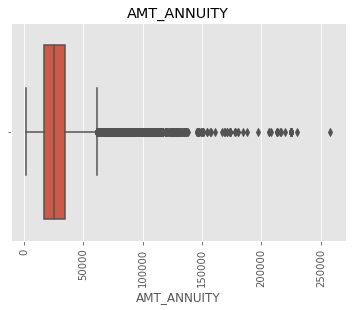

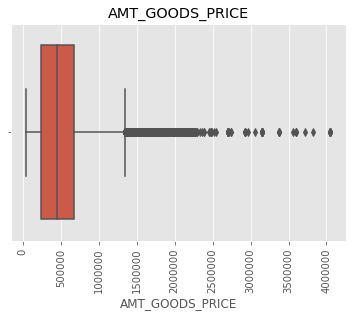

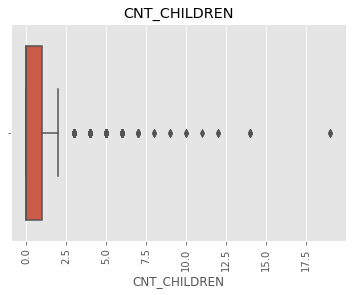

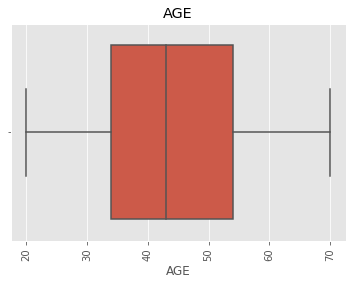

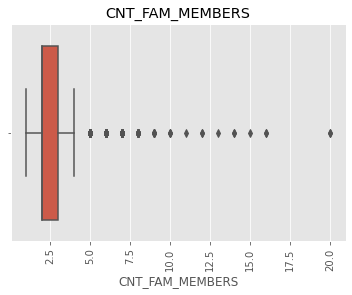

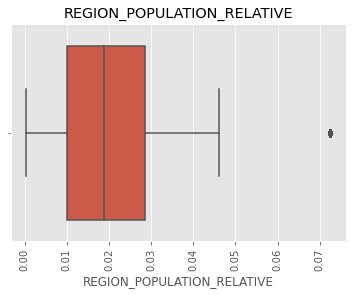

In [54]:
for col in check_outliers:
    sns.boxplot(x= df[col])
    plt.ticklabel_format(axis = 'x',style = 'plain')
    plt.xticks(rotation = 90)
    plt.title(col)
    plt.show()

# Explotary Data Analysis

In [55]:
df['DEFAULTER'].value_counts()

0    282686
1     24825
Name: DEFAULTER, dtype: int64

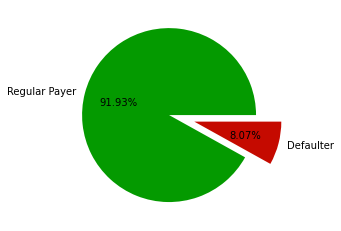

In [56]:
plt.pie(
    df['DEFAULTER'].value_counts(),
    labels=['Regular Payer','Defaulter'],
    autopct='%.2f%%', 
    colors = ['#049a00','#c50a00'],
    explode = [0, 0.3]
);

## Univariante Analysis 

In [57]:

defaulter_df = df[df['DEFAULTER'] == 1]

payer_df = df[df['DEFAULTER'] == 0]

In [58]:
def numerical_univariant_with_outliers(i):
    
    plt.figure(figsize=(20, 10))
    sns.distplot(
        defaulter_df[defaulter_df[i] <= max(defaulter_df[i])][i],
        label='defaulter_df',
        hist=False,
        color='green'
        
    )        
    sns.distplot(
        payer_df[payer_df[i] <= max(payer_df[i])][i],
        label='Payer',
        hist=False,
        color='red'
    )
    
    print(f'{i} Regular Payer :')
    print(f' minimum value Excluding outliers is {max(payer_df[i])}')
    print(f' maximum value is Excluding outliers {min(payer_df[i])}')
    
    print('*'*20)
    print(f'{i} Defaulter')
    print(f' minimum value with outliers is {max(defaulter_df[i])}')
    print(f' maximum value with outliers is {min(defaulter_df[i])}')
    plt.title(f'{i} with outluers')
    
    plt.ticklabel_format(style='plain', axis='x')
    plt.legend()
    plt.show()

In [59]:
def numerical_univariant_without_outliers(feature):
    
    # approved loan applications
    payer_q1 = payer_df[feature].quantile(0.25)
    payer_q3 = payer_df[feature].quantile(0.75)
    payer_iqr = payer_q3 - payer_q1
    payer_min_value =  (1.5 * payer_iqr - payer_q1)
    payer_max_value = (payer_q3 + 1.5 * payer_iqr)
    
    # defaulter loan applications
    defaulter_q1 = defaulter_df[feature].quantile(0.25)
    defaulter_q3 = defaulter_df[feature].quantile(0.75)
    defaulter_iqr = defaulter_q3 - defaulter_q1
    defaulter_min_value = ( 1.5 * defaulter_iqr - defaulter_q1)
    defaulter_max_value = (defaulter_q3 + 1.5 * defaulter_iqr)

    
    
    plt.figure(figsize=(20, 10))
    sns.distplot(
        payer_df[payer_df[feature] <= payer_max_value][feature],
        label='Regulaer Payer',
        hist=False,
        color='green'
        
    )        
    sns.distplot(
        defaulter_df[defaulter_df[feature] <= defaulter_max_value][feature],
        label='Defaulter',
        hist=False,
        color='red'
    )
    
    print(f'{feature} Regular Payer loan application')
    print(f' minimum value Excluding outliers is {int(payer_min_value)}')
    print(f' maximum value is Excluding outliers {int(payer_max_value)}')
    
    print('*'*20)
    print(f'{feature} Defaulter loan application')
    print(f' minimum value Excluding outliers is {int(defaulter_min_value)}')
    print(f' maximum value Excluding outliers is {int(defaulter_max_value)}')
    plt.title(f'{feature} Excluding Outliers')
    
    plt.ticklabel_format(style='plain', axis='x')
    plt.legend()
    plt.show()
    

In [60]:
uni_cols = ['CNT_CHILDREN','CNT_FAM_MEMBERS','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE',
            'AMT_REQ_CREDIT_BUREAU_YEAR','YRS_EMPLOYED'
           ]

In [61]:
### Univariate analysis

def univariate_num(x):
    
    
    df1_q1 = defaulter_df[x].quantile(0.25)
    df1_q3 = defaulter_df[x].quantile(0.75)
    df1_IQR = df1_q3 - df1_q1
    min_value_1 = abs((df1_q1 - 1.5 * df1_IQR))
    max_value_1 = (df1_q3 + 1.5 * df1_IQR)
    
    # Payers
    df0_q1 = payer_df[x].quantile(0.25)
    df0_q3 = payer_df[x].quantile(0.75)
    df0_IQR = df0_q3 - df0_q1
    min_value_0 = abs((df0_q1 - 1.5 * df0_IQR))
    max_value_0 = (df0_q3 + 1.5 * df0_IQR)
    
    plt.figure(figsize=(20, 8))
    # defaulter_dfs plot
    sns.distplot(defaulter_df[defaulter_df[x] <= max_value_1][x], label= "Defaulters", hist=False, color='red')
    # Payers plot
    sns.distplot(payer_df[payer_df[x] <= max_value_0][x], label= "Payers", hist=False, color='blue')
    
    print(f'{x} of Payers ')
    print(f' minimum value Excluding outliers is {int(min_value_0)}')
    print(f' maximum value is Excluding outliers {int(max_value_0)}')
    
    print('*'*20)
    print(f'{x} of defaulter_dfs')
    print(f' minimum value Excluding outliers is {int(min_value_1)}')
    print(f' maximum value Excluding outliers is {int(max_value_1)}')
    plt.title(f'{x}')
    
    plt.ticklabel_format(style='plain', axis='x')
    plt.legend()
    plt.show()

In [62]:
# function to plot categorical column to two subplots of approved and decliend loan applications plots
def categorical_univariant_analysis(feature):
    plt.style.use('ggplot')
    plt.figure(figsize=(18,8))
    plt.subplot(1,2,1)
    
    
    palette  = ['tab:green', 'tab:red']
    
    # for clients with Regular Payer application
    ax1 = sns.countplot(
        
        data = payer_df,
        x = feature,
        palette= palette
        
                    )
    
    ax1.set(xlabel = feature, ylabel = 'count')
    plt.title(f'{feature} of Regular Payers')
    
    
    #perc_above_bars(ax)
    plt.xticks(rotation = 90)
    print(f"Regular Payer percentage for each class in {feature}: \n")
    # calculate the percentage of the Regular Payer application from the original data (previous_df)
    print(round((payer_df[feature].value_counts()/len(df))*100,1),'\n')
    print("*"*25)
    
    for p in ax1.patches:
        percentage = f'{100 * p.get_height()/len(payer_df):.2f}'
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax1.annotate(percentage, (x, y),ha='center')
    
    
    # for clients with Defaulter application
    plt.subplot(1,2,2)
    sns.color_palette('RdBu')
    
    ax2 = sns.countplot(
        data = defaulter_df,
        x = feature,
        order=sorted(defaulter_df[feature].unique())
                    )
    ax2.set(xlabel = feature, ylabel = 'count')
    
    
    for p in ax2.patches:
        
        percentage = f'{100 * p.get_height()/len(defaulter_df):.2f}'
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax2.annotate(percentage, (x, y),ha='center')
    
    plt.title(f'{feature} of Defaulters')
    print(f"Defaulter percentage for each class in {feature}: \n")
    # calculate the percentage of the Defaulter application from the original data
    print(round((defaulter_df[feature].value_counts()/len(df))*100,1),'\n')
    print("*"*25)
    
    
    
    
    plt.xticks(rotation = 90)
    
    plt.tight_layout()
    plt.show()

From the below graphs, we can conclude that :

- In the`CNT_CHILDREN` column:
    - Clients with *one child* have the highest propability of benig a Regular Payer
    

- In the`CNT_FAM_MEMBERS` column:
    - Clients with *Two Family Members* have the highest propability of benig a Regular Payer
    

- In the`AMT_INCOME_TOTAL` column:
    - Most clients has amount credit ranges from approx 55k to approx 100k
    - There is no telling at what *Income Amount* most of its clients are Defaulter or Regular Payers  
    
    
- In the`AMT_CREDIT` column:
    - Clients that apply for loan amount greater than 750k has a higher chance of being Regular Payers
    
    
- In the`AMT_ANNUITY ` column:
    - Most clients has annuity amount ranges from 10k to 30k
    
    
- In the`AMT_GOODS_PRICE ` column:
    - Clients that apply loan for goods thats excced 600k have higher chance of being *Regular Payers*
    - While client's goods that are less than 600k the propapility of being Defaulters or regular payers are colse
    
    
- In the`Age` column:
    - Clients that ages are less than 40 years old have higher propility of being *defaulters*
    
    
- In the `YRS_EMPLOYED` column:
    - Clients who have been employed for more than 10 years have a higher probability of being *Regular Payers*, especially when they have been employed for more than 25 years 
    - Clients that have been employed for less than 10 years  have a higher probability of being *Defaulters*

CNT_CHILDREN Regular Payer loan application
 minimum value Excluding outliers is 1
 maximum value is Excluding outliers 2
********************
CNT_CHILDREN Defaulter loan application
 minimum value Excluding outliers is 1
 maximum value Excluding outliers is 2


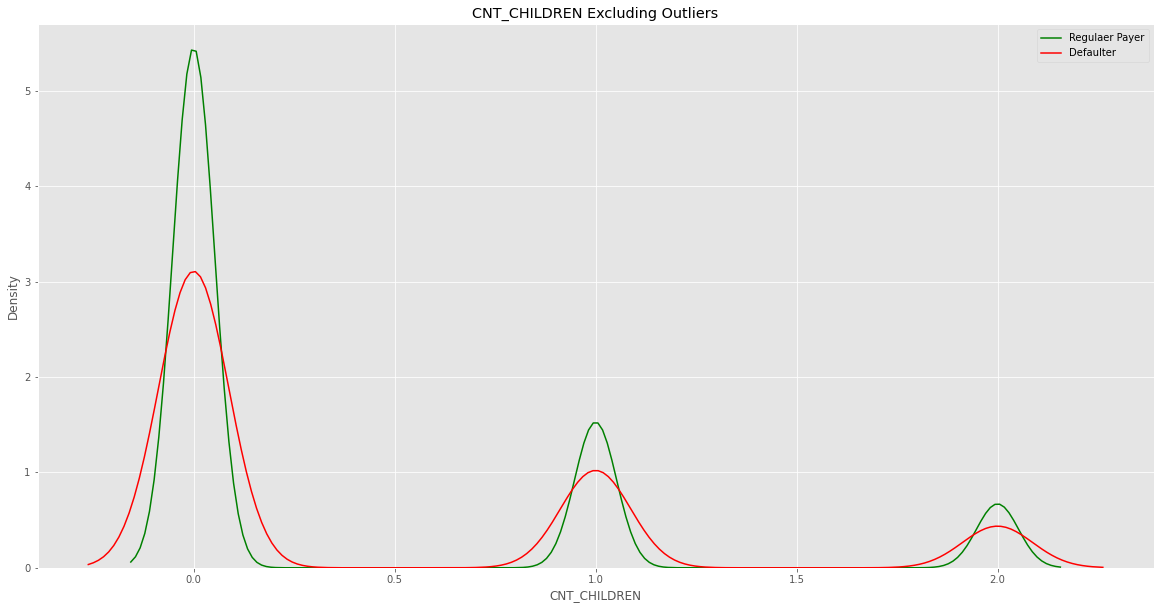

CNT_FAM_MEMBERS Regular Payer loan application
 minimum value Excluding outliers is 0
 maximum value is Excluding outliers 4
********************
CNT_FAM_MEMBERS Defaulter loan application
 minimum value Excluding outliers is 0
 maximum value Excluding outliers is 4


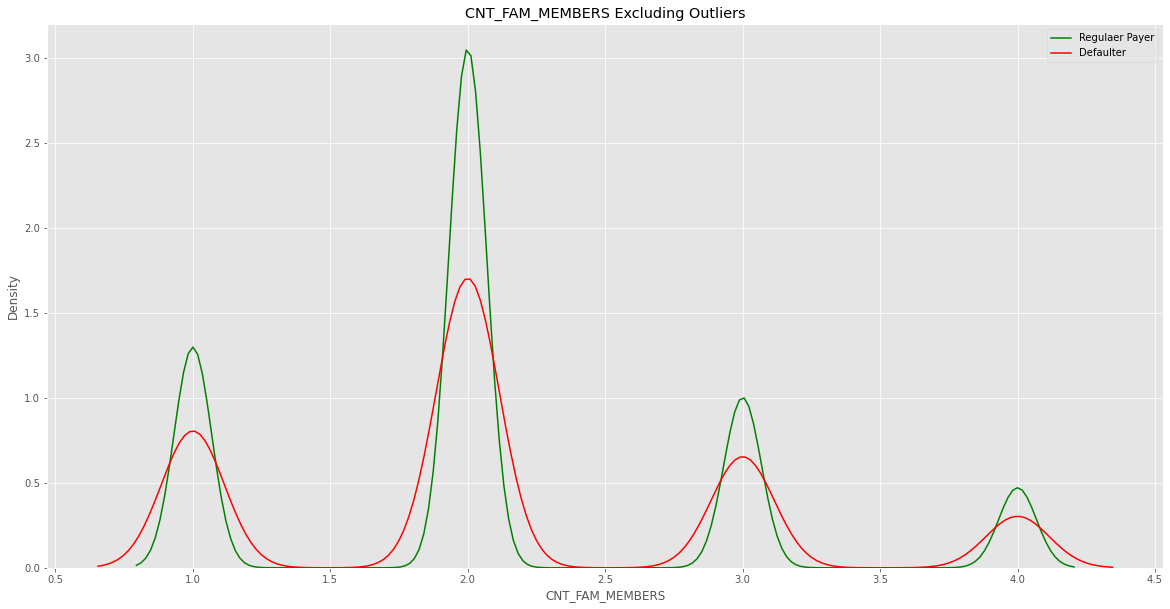

AMT_INCOME_TOTAL Regular Payer loan application
 minimum value Excluding outliers is 22500
 maximum value is Excluding outliers 337500
********************
AMT_INCOME_TOTAL Defaulter loan application
 minimum value Excluding outliers is 22500
 maximum value Excluding outliers is 337500


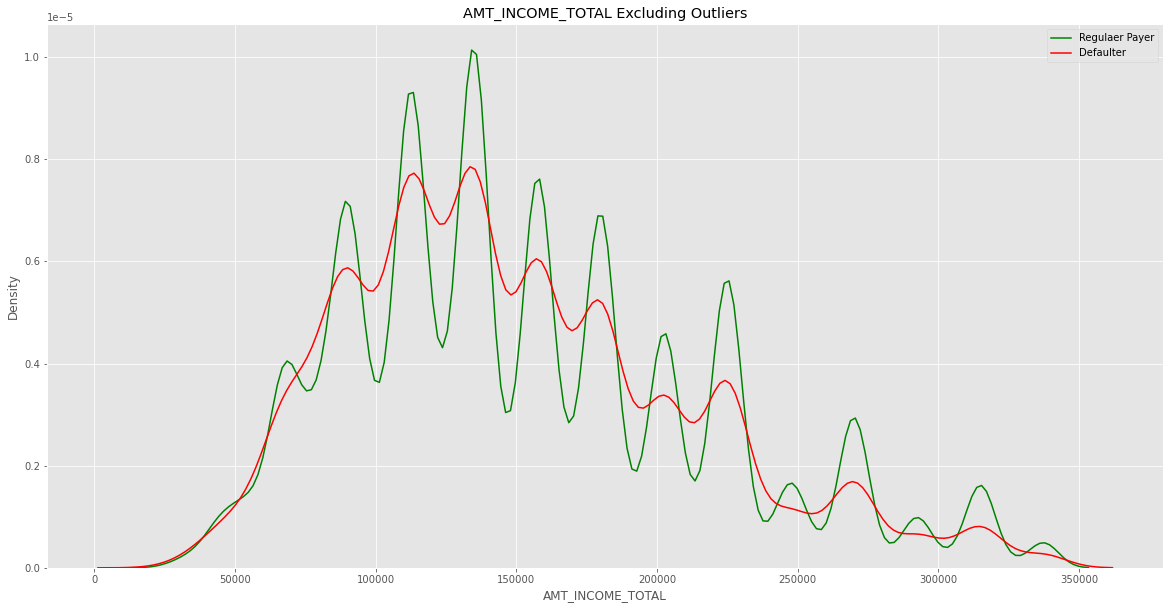

AMT_CREDIT Regular Payer loan application
 minimum value Excluding outliers is 540000
 maximum value is Excluding outliers 1620000
********************
AMT_CREDIT Defaulter loan application
 minimum value Excluding outliers is 388972
 maximum value Excluding outliers is 1406687


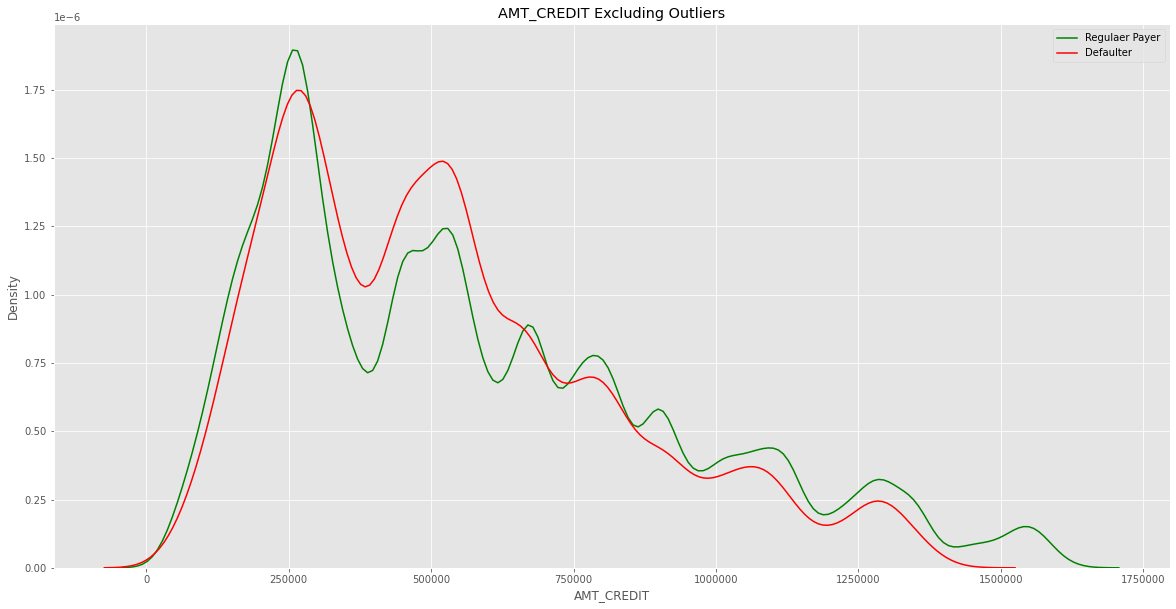

AMT_ANNUITY Regular Payer loan application
 minimum value Excluding outliers is 10983
 maximum value is Excluding outliers 62188
********************
AMT_ANNUITY Defaulter loan application
 minimum value Excluding outliers is 6061
 maximum value Excluding outliers is 56398


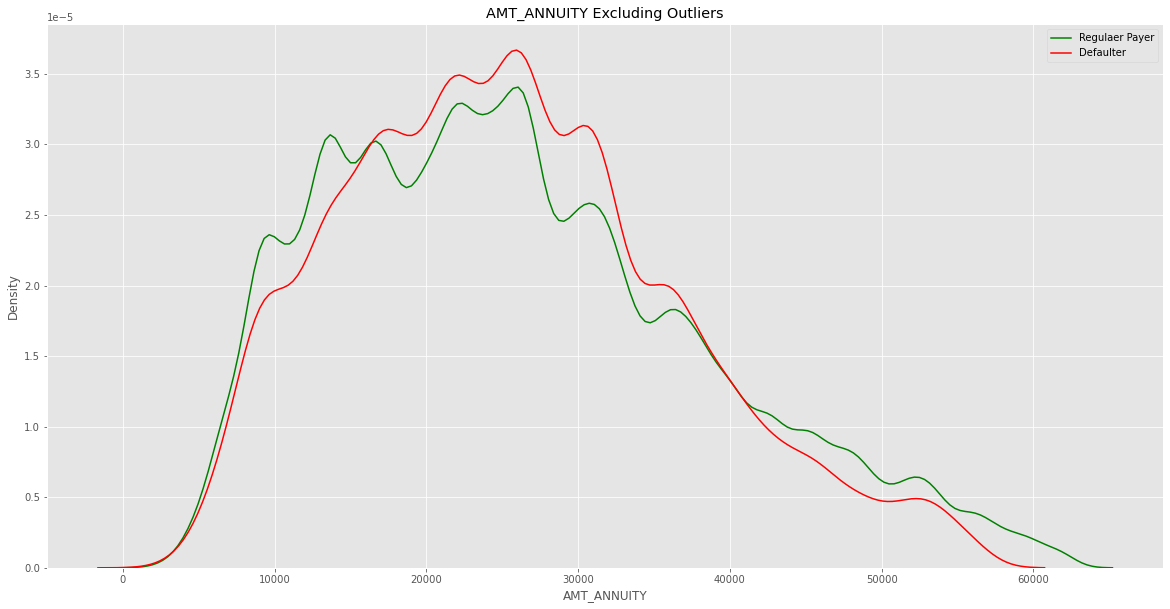

AMT_GOODS_PRICE Regular Payer loan application
 minimum value Excluding outliers is 431253
 maximum value is Excluding outliers 1354755
********************
AMT_GOODS_PRICE Defaulter loan application
 minimum value Excluding outliers is 416250
 maximum value Excluding outliers is 1329750


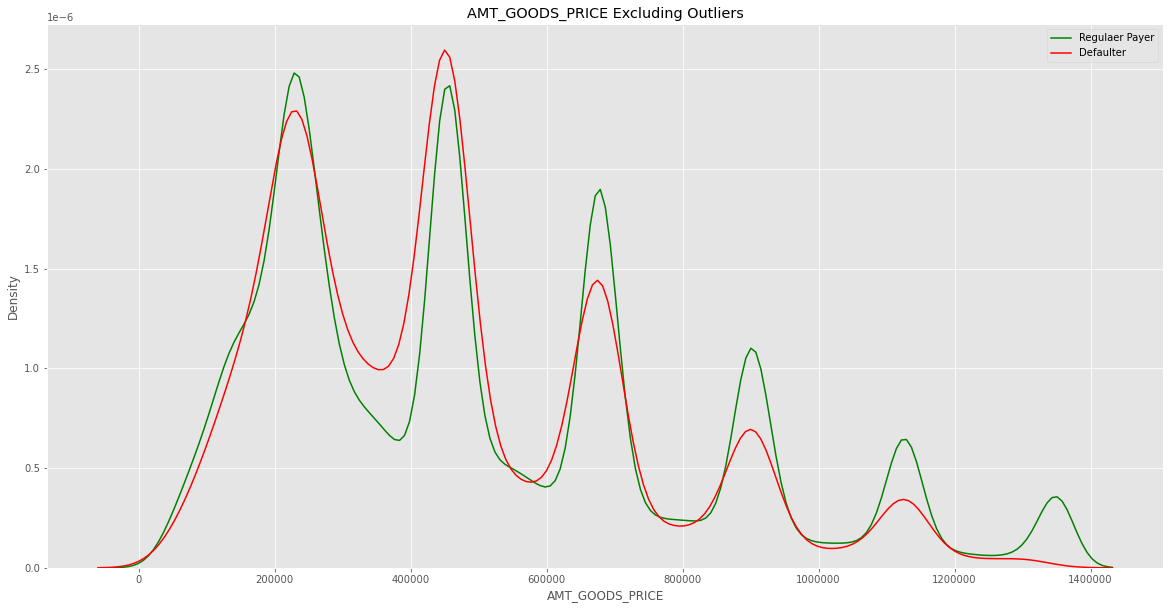

AGE Regular Payer loan application
 minimum value Excluding outliers is -4
 maximum value is Excluding outliers 84
********************
AGE Defaulter loan application
 minimum value Excluding outliers is -2
 maximum value Excluding outliers is 78


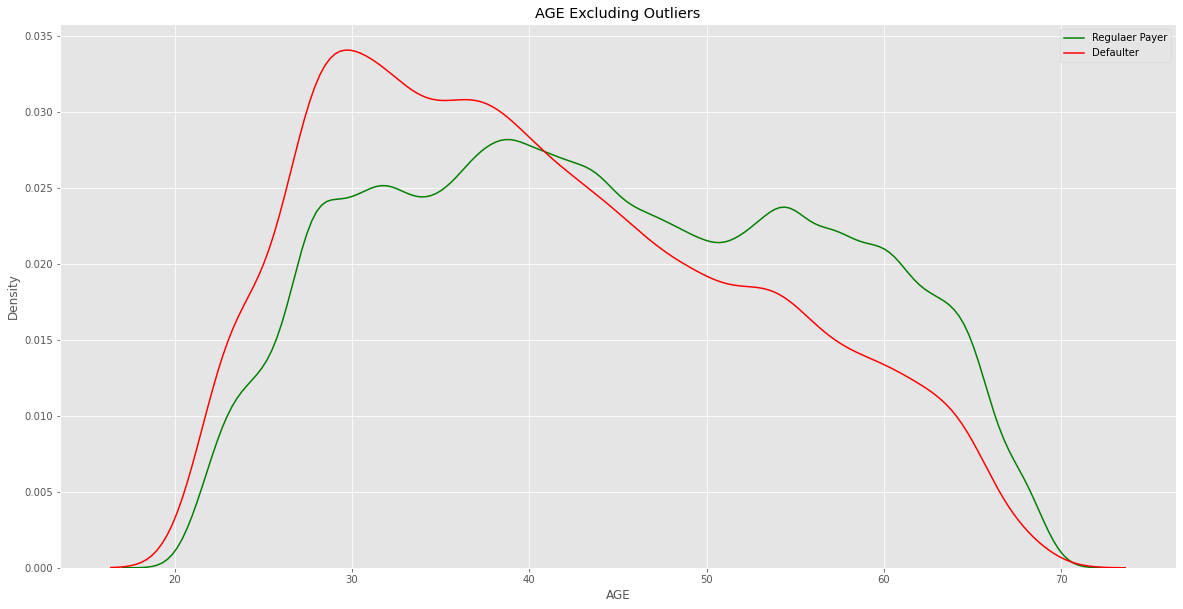

AMT_REQ_CREDIT_BUREAU_YEAR Regular Payer loan application
 minimum value Excluding outliers is 2
 maximum value is Excluding outliers 6
********************
AMT_REQ_CREDIT_BUREAU_YEAR Defaulter loan application
 minimum value Excluding outliers is 2
 maximum value Excluding outliers is 6


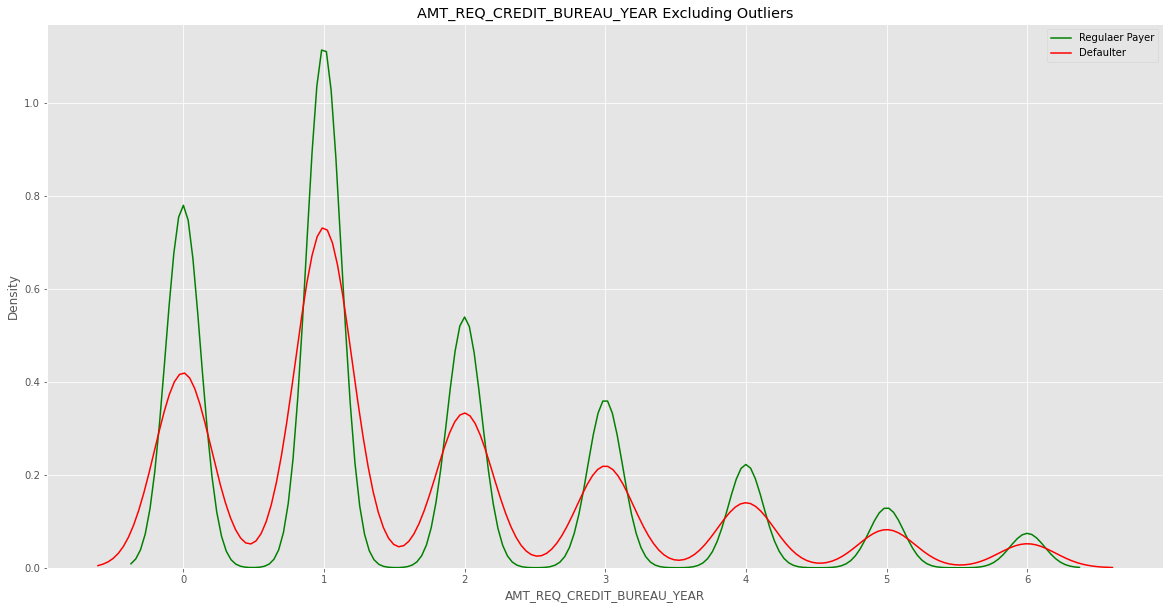

YRS_EMPLOYED Regular Payer loan application
 minimum value Excluding outliers is 19
 maximum value is Excluding outliers 37
********************
YRS_EMPLOYED Defaulter loan application
 minimum value Excluding outliers is 11
 maximum value Excluding outliers is 21


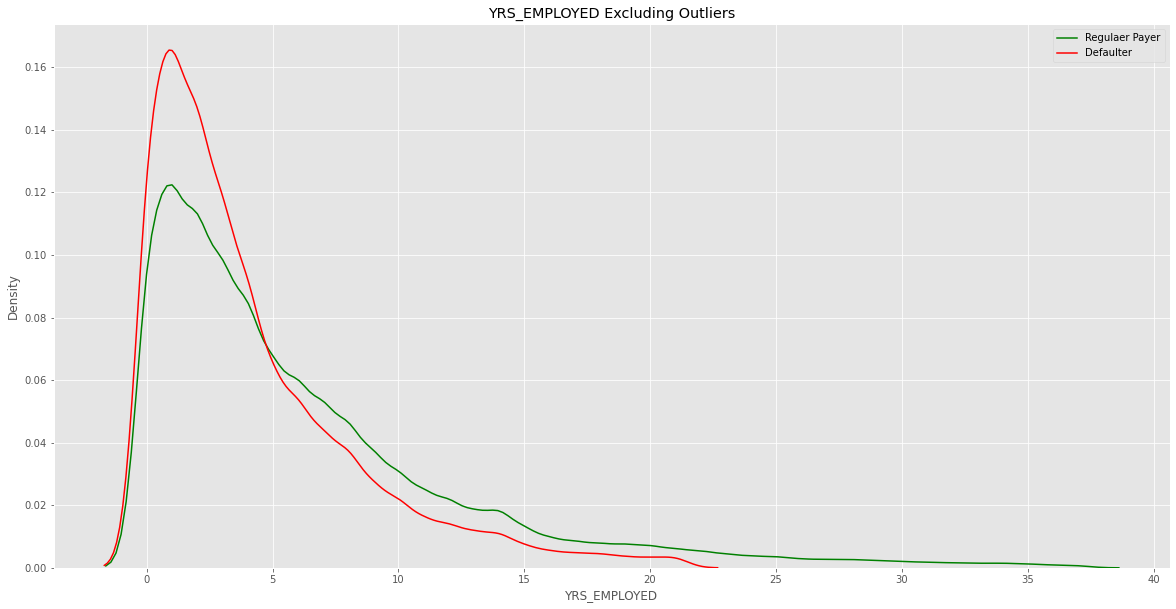

In [63]:
for col in uni_cols:
    numerical_univariant_without_outliers(col)
    

In [64]:
df.drop('FLAG_DOCUMENT_3', axis = 1, inplace = True)

### Categorical Analysis

In [65]:
cat_cols = df.select_dtypes('object').columns.tolist()

From the below graphs, we can conclude that:
- In `NAME_CONTRACT_TYPE` column:
    - Most clients **Cash loans**  (90.5)

    - Cash loan(8.4%)
    - rev (45%)
    - Most Refused applications that uses *Revolving loan*, (45%) out of those Contracts that uses 
    
    
- In `CODE_GENDER` column:
    - Most clients that apply for loans are **Femals** (65.8%)
    - We can see that Males Defaulters parcentages is higher than the Regular Payers one
    - Males chances of becoming defaulters are 10 % of total Males, while females have chances of becoming defaulters are approx 6.9% from total Females. So we can say that Males have the higher chances to become *Defaulters*
    

- In `FLAG_OWN_CAR` column:
    - Most clients **Don't own a car** (66%)
    - Most *defaulters* don't own a car 
    - N, defaulters:(8.48%)
    - Y, defaulters: (7.35%)
    
- In `FLAG_OWN_REALTY` column:
    - Most clients **owns a property** (69.3%)
    - Most *defaulters* don't own a property
    - N, defaulters:(8.4)
    - Y, defaulters: (7.9)
    
    
- In `NAME_TYPE_SUITE` column:
    
    - Most clients applying for loans **Unaccompanied** (81.2%)
    - Unaccompanied(8.1)
    - Family(7.6)
    - Most Defaulters are Unaccompanied
    
- In `NAME_INCOME_TYPE` column:
    - Most clients applying are **Working** (51.7%)
    - Most *Regular Payers* income type is working then Commercial associate and then Pensioner
    
    
- In `NAME_EDUCATION_TYPE` column:
    - Most clients educatuon is **Secondary / secondary special** (71%)
    - Most *Regular Payers* have Secondary / secondary special education, 91% of the total  Secondary / secondary special education
    
    
- In `NAME_FAMILY_STATUS` column:
    - Most clients applying are **Married** (63.8%)
    - Most *regular payers* are married, 92.47% of total of Married clients

    
- In `NAME_HOUSING_TYPE` column:
    - Most clients housing is **House / apartment** (88.7%)
    - Most *regular payers* have House / apartment, 92.1% of total clients with House / apartment

- In `OCCUPATION_TYPE` column:
    - Most clients Occupation is **Laborers** (49.3%)
    - most *regular payers* are Laborers, 92.29% of total laborers clients 
    - We can notice that only 0.2% of clients are IT & HR staff, and all of them are **not** defaulters 

Regular Payer percentage for each class in NAME_CONTRACT_TYPE: 

Cash loans         82.9
Revolving loans     9.0
Name: NAME_CONTRACT_TYPE, dtype: float64 

*************************
Defaulter percentage for each class in NAME_CONTRACT_TYPE: 

Cash loans         7.6
Revolving loans    0.5
Name: NAME_CONTRACT_TYPE, dtype: float64 

*************************


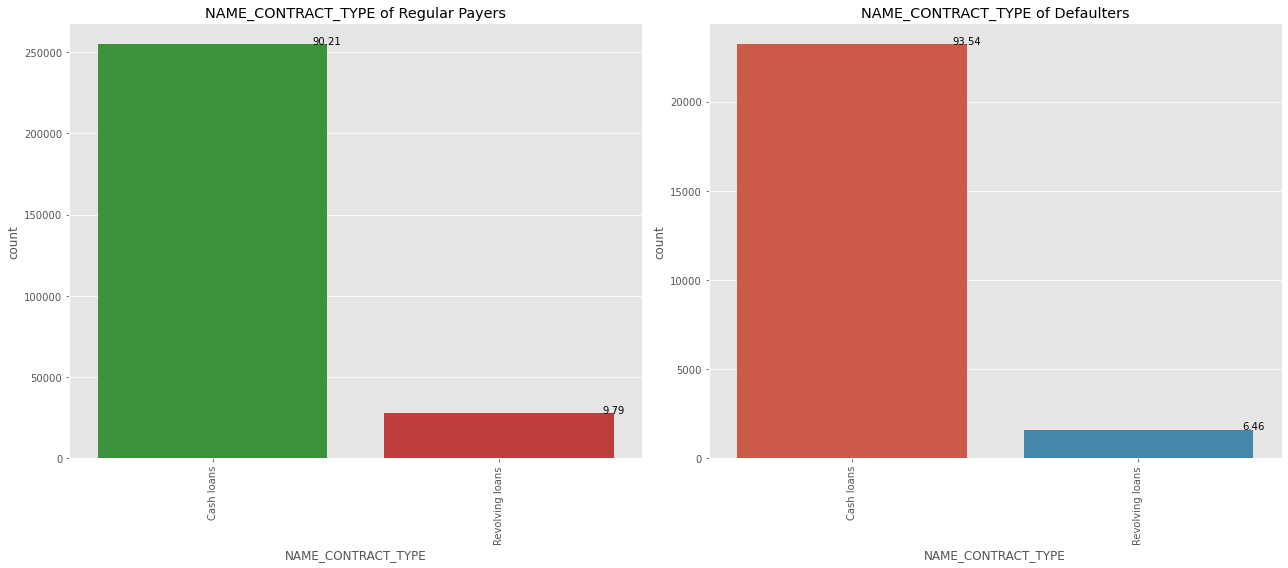

Regular Payer percentage for each class in CODE_GENDER: 

F    61.2
M    30.7
Name: CODE_GENDER, dtype: float64 

*************************
Defaulter percentage for each class in CODE_GENDER: 

F    4.6
M    3.5
Name: CODE_GENDER, dtype: float64 

*************************


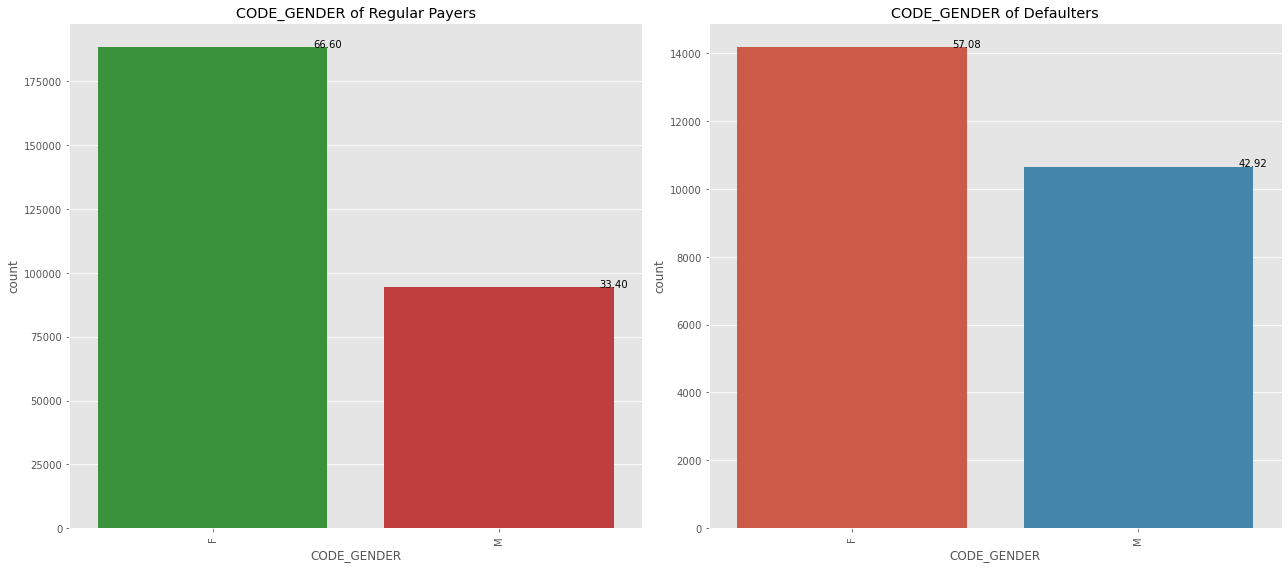

Regular Payer percentage for each class in FLAG_OWN_CAR: 

N    60.4
Y    31.5
Name: FLAG_OWN_CAR, dtype: float64 

*************************
Defaulter percentage for each class in FLAG_OWN_CAR: 

N    5.6
Y    2.5
Name: FLAG_OWN_CAR, dtype: float64 

*************************


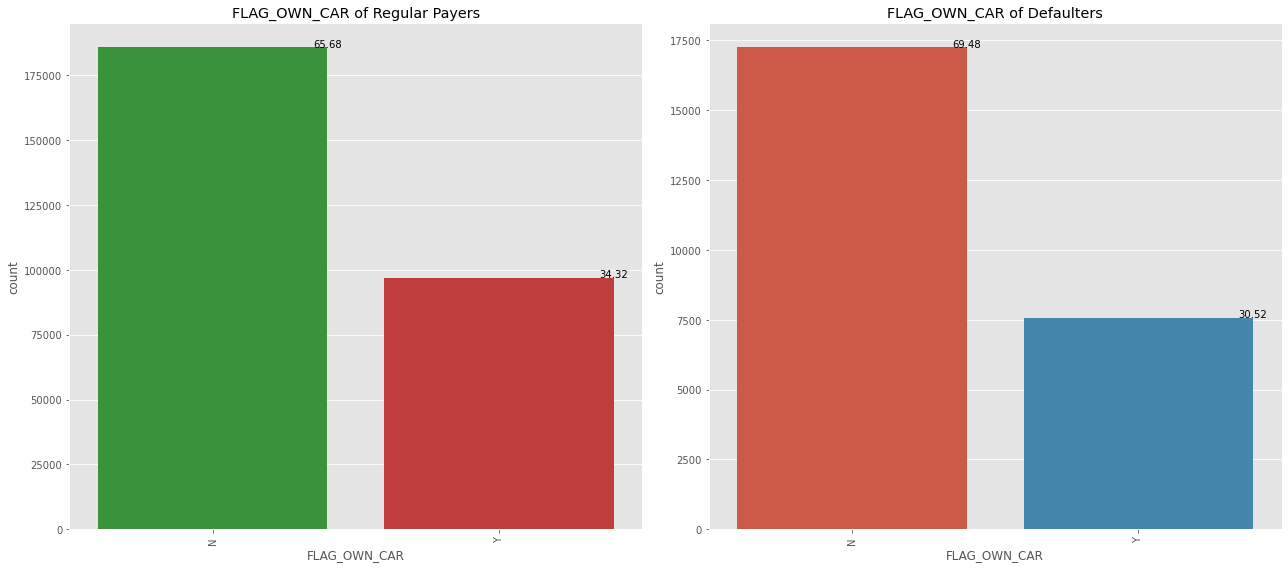

Regular Payer percentage for each class in FLAG_OWN_REALTY: 

Y    63.8
N    28.1
Name: FLAG_OWN_REALTY, dtype: float64 

*************************
Defaulter percentage for each class in FLAG_OWN_REALTY: 

Y    5.5
N    2.6
Name: FLAG_OWN_REALTY, dtype: float64 

*************************


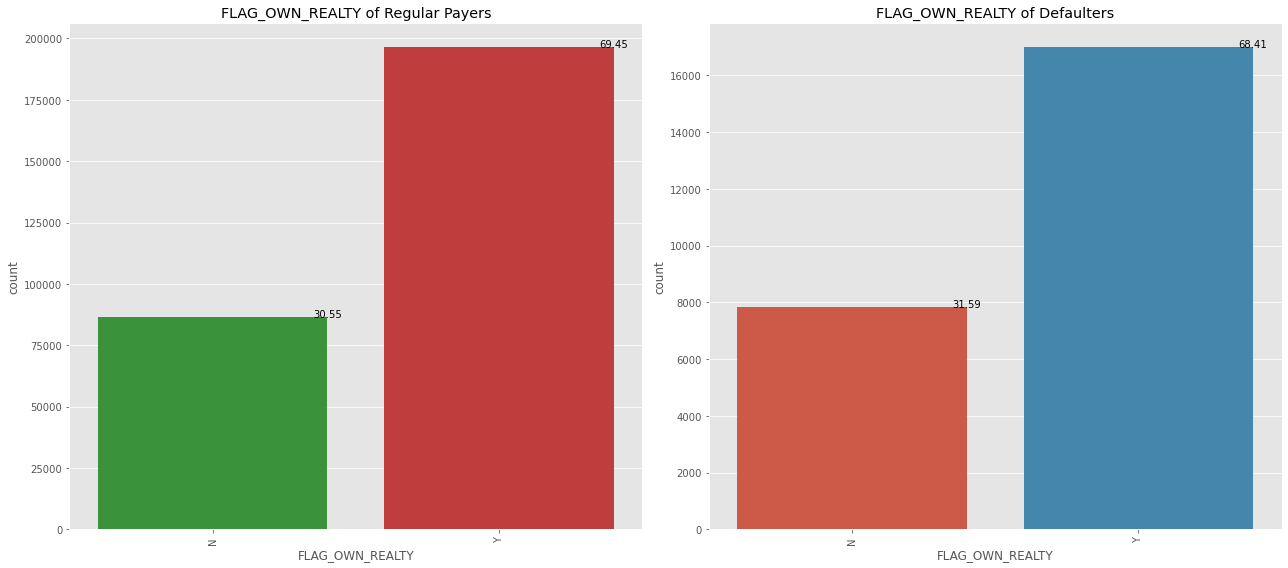

Regular Payer percentage for each class in NAME_TYPE_SUITE: 

Unaccompanied      74.6
Family             12.1
Spouse, partner     3.4
Children            1.0
Other_B             0.5
Other_A             0.3
Group of people     0.1
Name: NAME_TYPE_SUITE, dtype: float64 

*************************
Defaulter percentage for each class in NAME_TYPE_SUITE: 

Unaccompanied      6.6
Family             1.0
Spouse, partner    0.3
Children           0.1
Other_B            0.1
Other_A            0.0
Group of people    0.0
Name: NAME_TYPE_SUITE, dtype: float64 

*************************


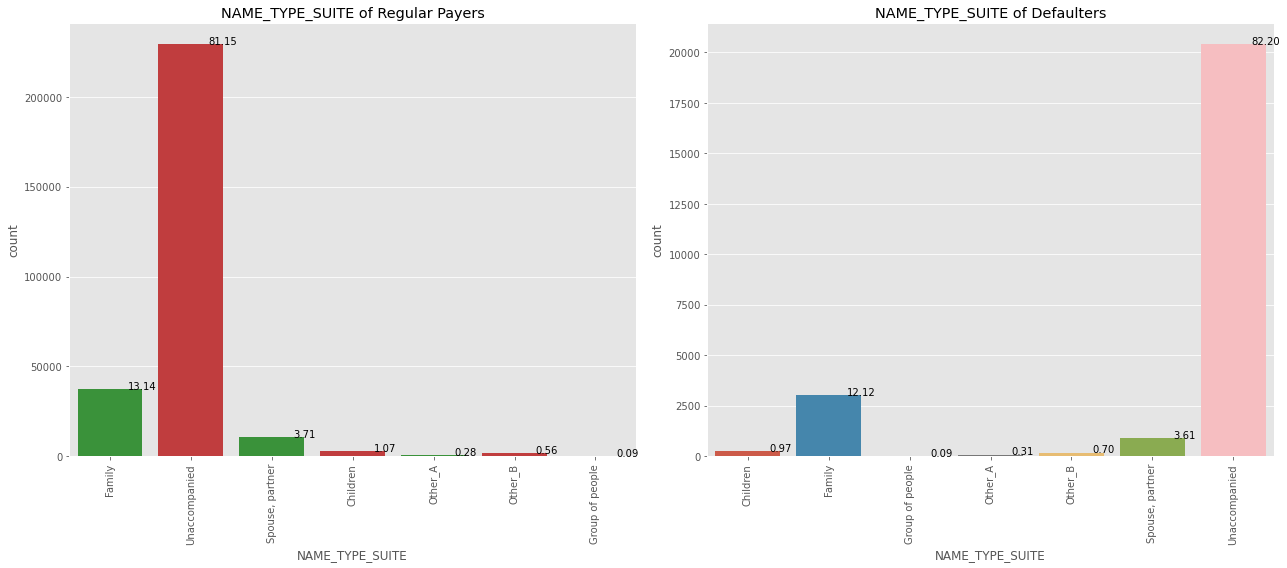

Regular Payer percentage for each class in NAME_INCOME_TYPE: 

Working                 46.7
Commercial associate    21.5
Pensioner               17.0
State servant            6.7
Student                  0.0
Unemployed               0.0
Businessman              0.0
Maternity leave          0.0
Name: NAME_INCOME_TYPE, dtype: float64 

*************************
Defaulter percentage for each class in NAME_INCOME_TYPE: 

Working                 5.0
Commercial associate    1.7
Pensioner               1.0
State servant           0.4
Unemployed              0.0
Maternity leave         0.0
Name: NAME_INCOME_TYPE, dtype: float64 

*************************


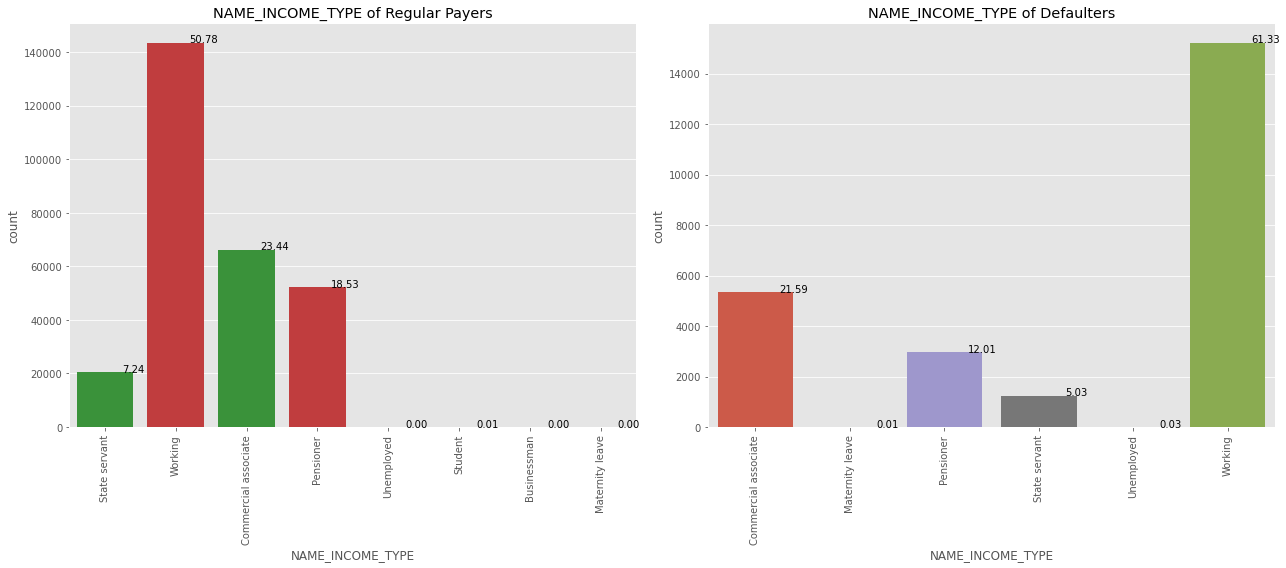

Regular Payer percentage for each class in NAME_EDUCATION_TYPE: 

Secondary / secondary special    64.7
Higher education                 23.0
Incomplete higher                 3.1
Lower secondary                   1.1
Academic degree                   0.1
Name: NAME_EDUCATION_TYPE, dtype: float64 

*************************
Defaulter percentage for each class in NAME_EDUCATION_TYPE: 

Secondary / secondary special    6.3
Higher education                 1.3
Incomplete higher                0.3
Lower secondary                  0.1
Academic degree                  0.0
Name: NAME_EDUCATION_TYPE, dtype: float64 

*************************


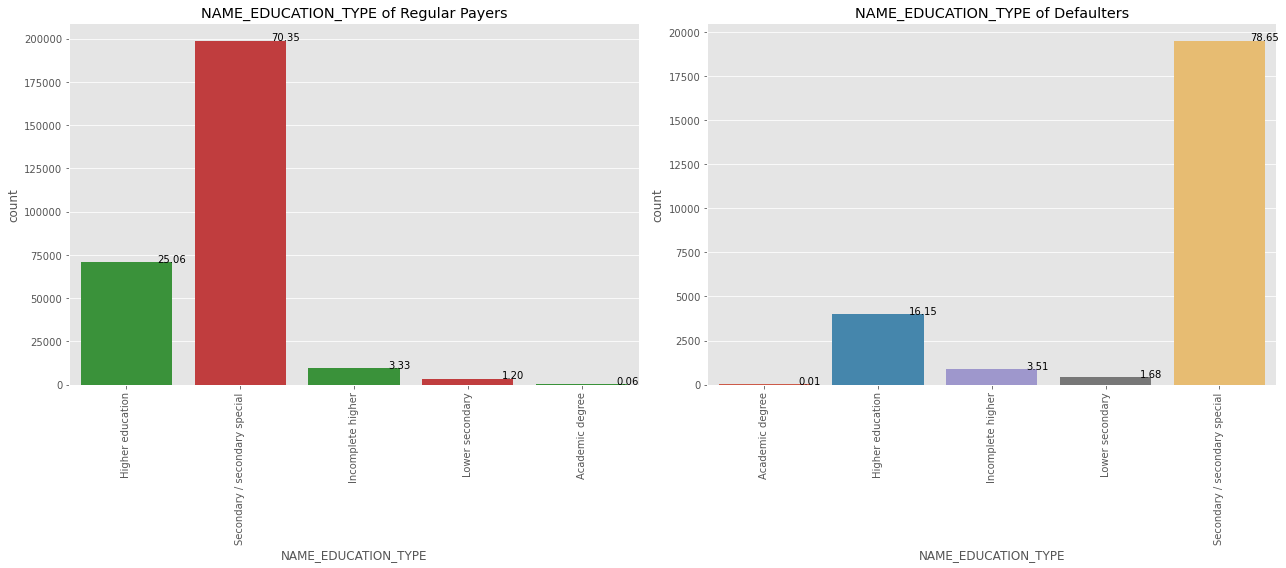

Regular Payer percentage for each class in NAME_FAMILY_STATUS: 

Married                 59.0
Single / not married    13.3
Civil marriage           8.7
Separated                5.9
Widow                    4.9
Unknown                  0.0
Name: NAME_FAMILY_STATUS, dtype: float64 

*************************
Defaulter percentage for each class in NAME_FAMILY_STATUS: 

Married                 4.8
Single / not married    1.4
Civil marriage          1.0
Separated               0.5
Widow                   0.3
Name: NAME_FAMILY_STATUS, dtype: float64 

*************************


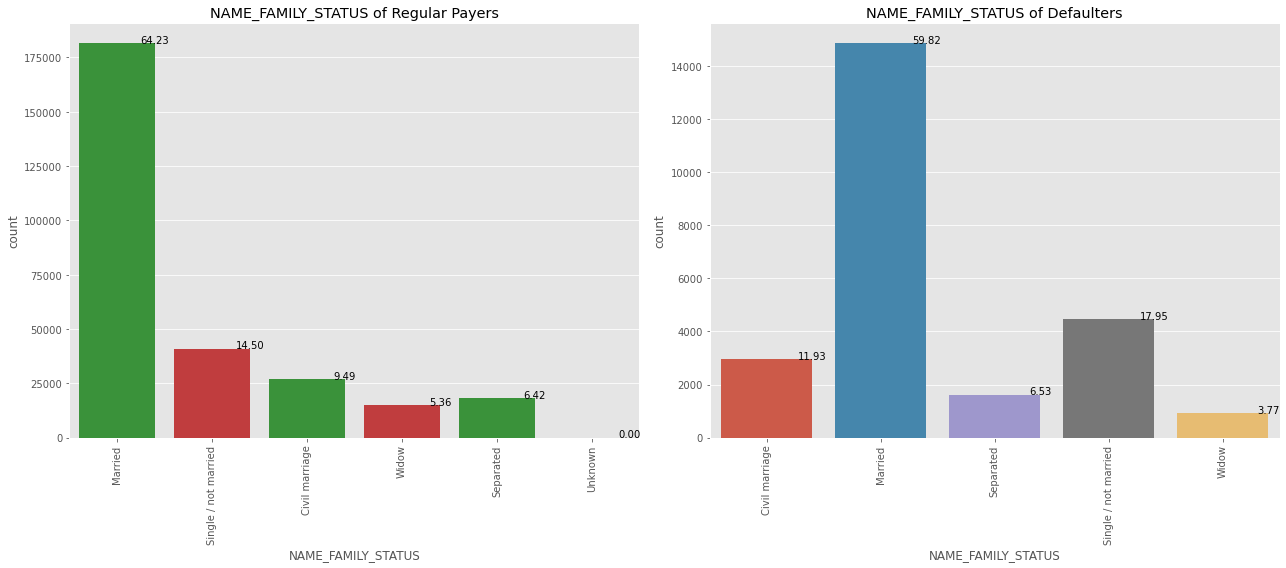

Regular Payer percentage for each class in NAME_HOUSING_TYPE: 

House / apartment      81.8
With parents            4.3
Municipal apartment     3.3
Rented apartment        1.4
Office apartment        0.8
Co-op apartment         0.3
Name: NAME_HOUSING_TYPE, dtype: float64 

*************************
Defaulter percentage for each class in NAME_HOUSING_TYPE: 

House / apartment      6.9
With parents           0.6
Municipal apartment    0.3
Rented apartment       0.2
Office apartment       0.1
Co-op apartment        0.0
Name: NAME_HOUSING_TYPE, dtype: float64 

*************************


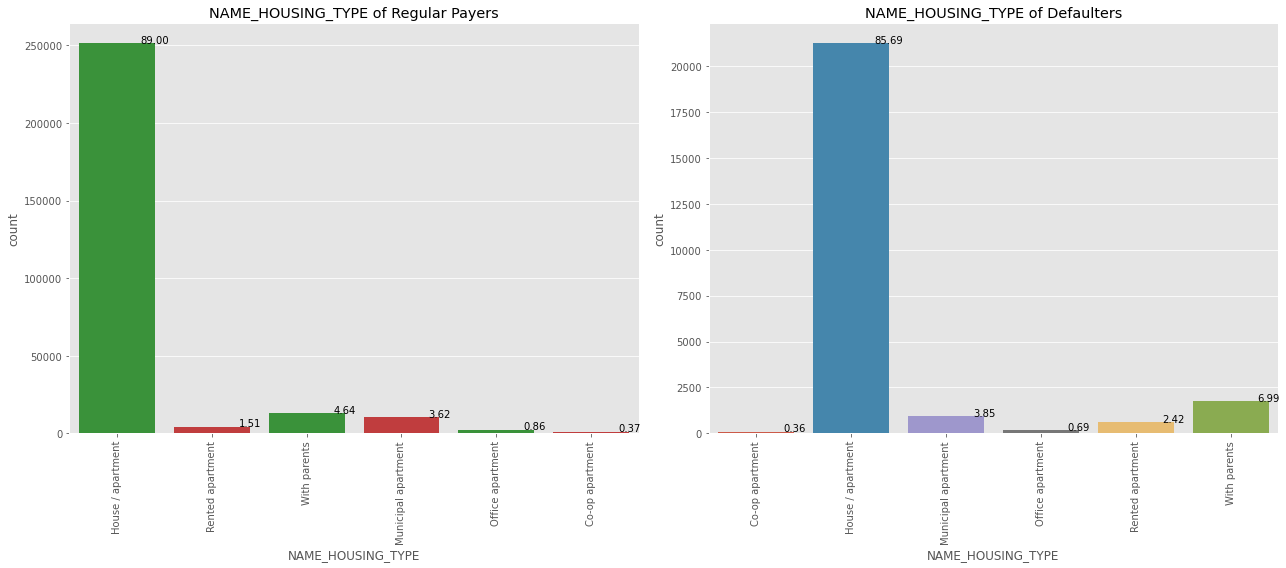

Regular Payer percentage for each class in OCCUPATION_TYPE: 

Laborers                 45.4
Sales staff               9.4
Core staff                8.4
Managers                  6.5
Drivers                   5.4
High skill tech staff     3.5
Accountants               3.0
Medicine staff            2.6
Security staff            2.0
Cooking staff             1.7
Cleaning staff            1.4
Private service staff     0.8
Low-skill Laborers        0.6
Secretaries               0.4
Waiters/barmen staff      0.4
Realty agents             0.2
HR staff                  0.2
IT staff                  0.2
Name: OCCUPATION_TYPE, dtype: float64 

*************************
Defaulter percentage for each class in OCCUPATION_TYPE: 

Laborers                 3.9
Sales staff              1.0
Drivers                  0.7
Core staff               0.6
Managers                 0.4
Security staff           0.2
High skill tech staff    0.2
Cooking staff            0.2
Medicine staff           0.2
Accountants  

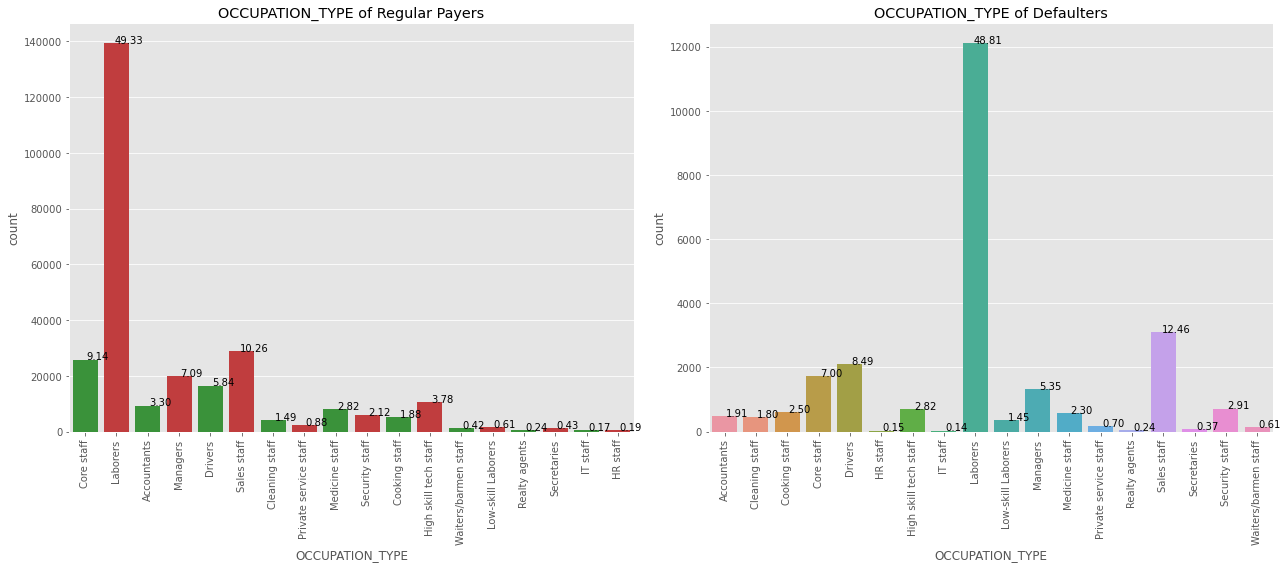

Regular Payer percentage for each class in WEEKDAY_APPR_PROCESS_START: 

TUESDAY      16.1
WEDNESDAY    15.5
MONDAY       15.2
THURSDAY     15.1
FRIDAY       15.0
SATURDAY     10.1
SUNDAY        4.8
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64 

*************************
Defaulter percentage for each class in WEEKDAY_APPR_PROCESS_START: 

TUESDAY      1.5
WEDNESDAY    1.4
FRIDAY       1.3
THURSDAY     1.3
MONDAY       1.3
SATURDAY     0.9
SUNDAY       0.4
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64 

*************************


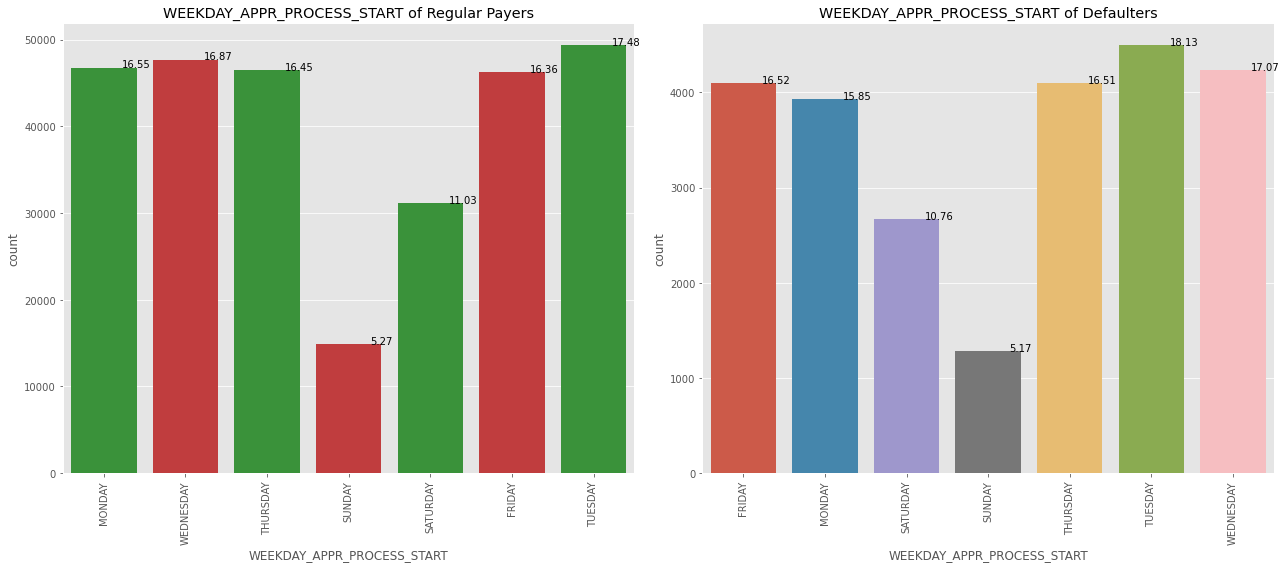

Regular Payer percentage for each class in ORGANIZATION_TYPE: 

Business Entity Type 3    37.1
Self-employed             11.2
Other                      5.0
Medicine                   3.4
Government                 3.1
Business Entity Type 2     3.1
School                     2.7
Trade: type 7              2.3
Kindergarten               2.1
Construction               1.9
Business Entity Type 1     1.8
Transport: type 4          1.6
Industry: type 9           1.0
Trade: type 3              1.0
Industry: type 3           1.0
Security                   1.0
Housing                    0.9
Military                   0.8
Industry: type 11          0.8
Bank                       0.8
Police                     0.7
Agriculture                0.7
Transport: type 2          0.7
Postal                     0.6
Security Ministries        0.6
Trade: type 2              0.6
Restaurant                 0.5
Services                   0.5
University                 0.4
Industry: type 7           0.4
Transp

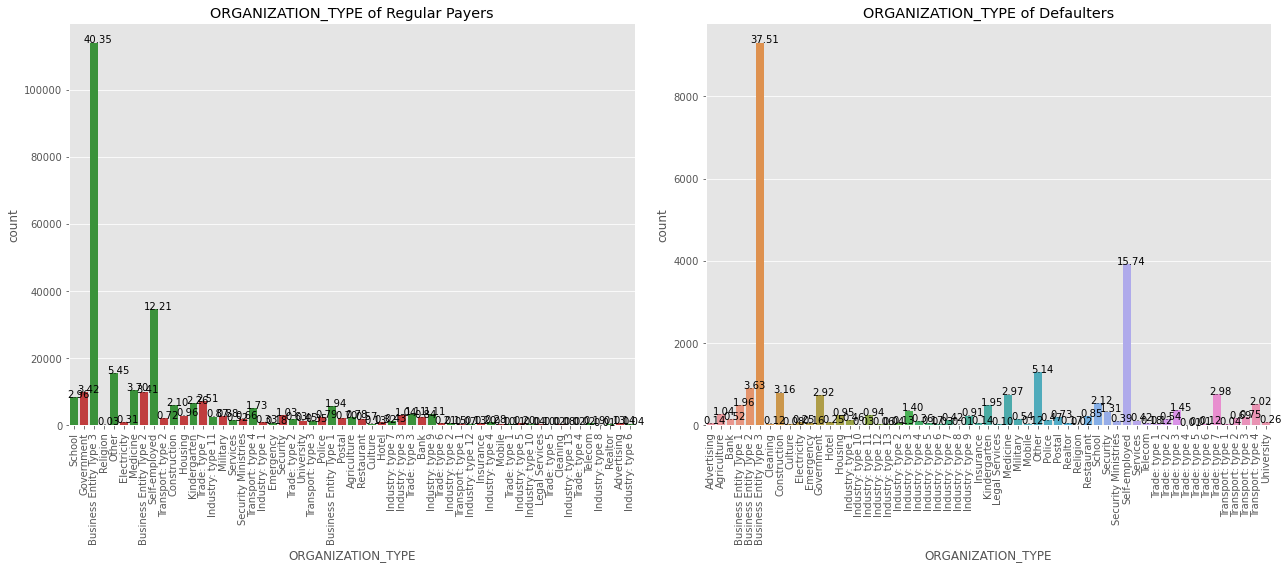

Regular Payer percentage for each class in INCOME_TOTAL_CAT: 

Medium    66.0
Low       17.7
High       6.1
V.low      1.4
V.high     0.8
Name: INCOME_TOTAL_CAT, dtype: float64 

*************************
Defaulter percentage for each class in INCOME_TOTAL_CAT: 

Medium    5.9
Low       1.6
High      0.4
V.low     0.1
V.high    0.0
Name: INCOME_TOTAL_CAT, dtype: float64 

*************************


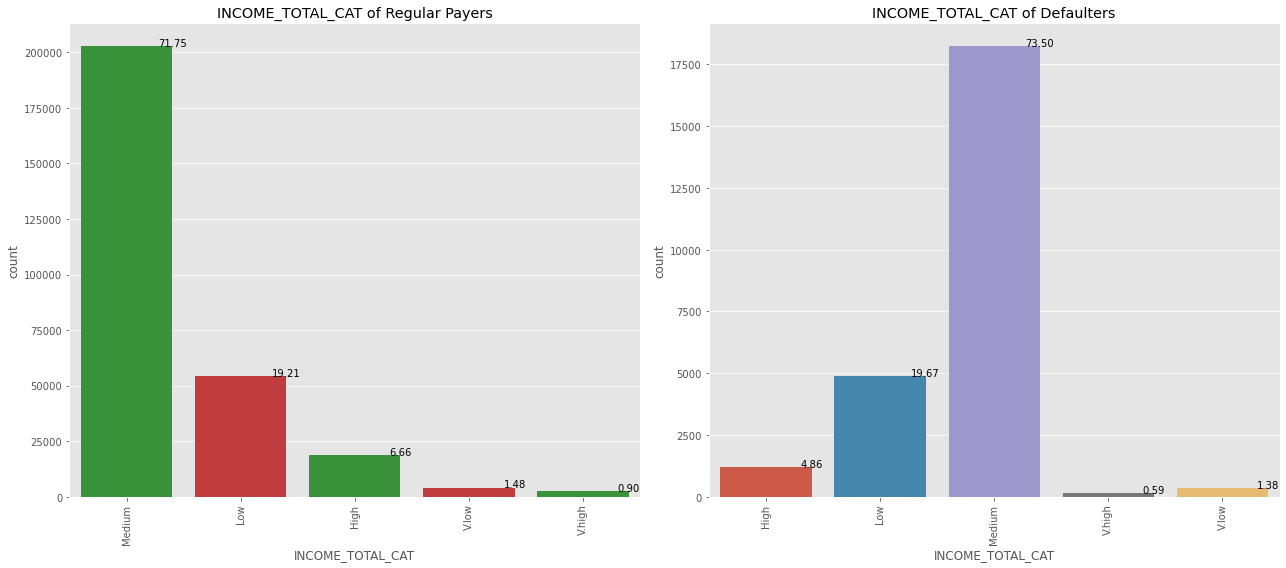

Regular Payer percentage for each class in CREDIT_CAT: 

V.high    47.5
Medium    25.5
High      17.1
Low        1.7
V.low      0.2
Name: CREDIT_CAT, dtype: float64 

*************************
Defaulter percentage for each class in CREDIT_CAT: 

V.high    4.0
Medium    2.1
High      1.9
Low       0.1
V.low     0.0
Name: CREDIT_CAT, dtype: float64 

*************************


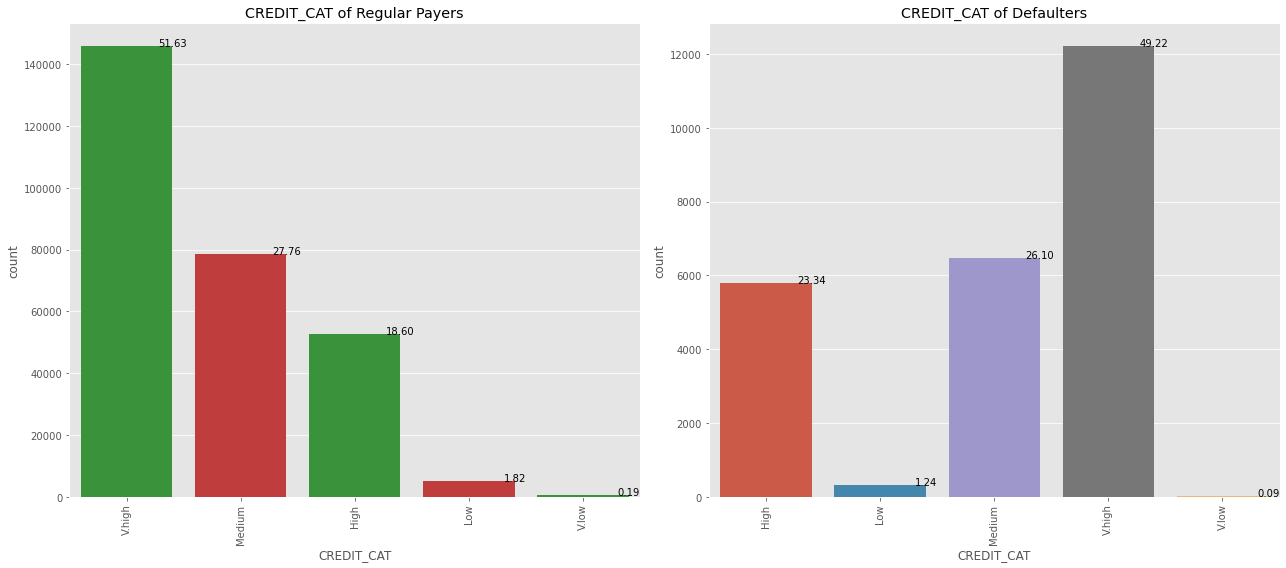

Regular Payer percentage for each class in GOODS_PRICE_CAT: 

V.high    37.8
Medium    28.6
High      22.9
Low        2.2
V.low      0.4
Name: GOODS_PRICE_CAT, dtype: float64 

*************************
Defaulter percentage for each class in GOODS_PRICE_CAT: 

V.high    2.7
High      2.7
Medium    2.5
Low       0.2
V.low     0.0
Name: GOODS_PRICE_CAT, dtype: float64 

*************************


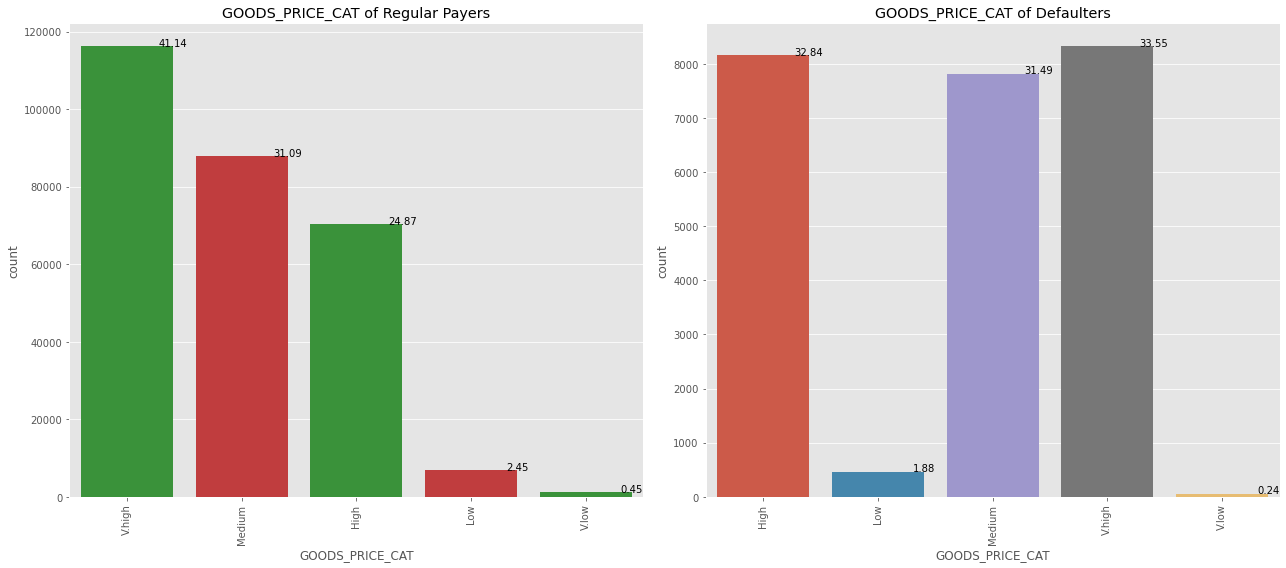

Regular Payer percentage for each class in ANNUITY_CAT: 

High      40.1
V.high    32.5
low       18.9
V.low      0.4
Name: ANNUITY_CAT, dtype: float64 

*************************
Defaulter percentage for each class in ANNUITY_CAT: 

High      3.9
V.high    2.8
low       1.4
V.low     0.0
Name: ANNUITY_CAT, dtype: float64 

*************************


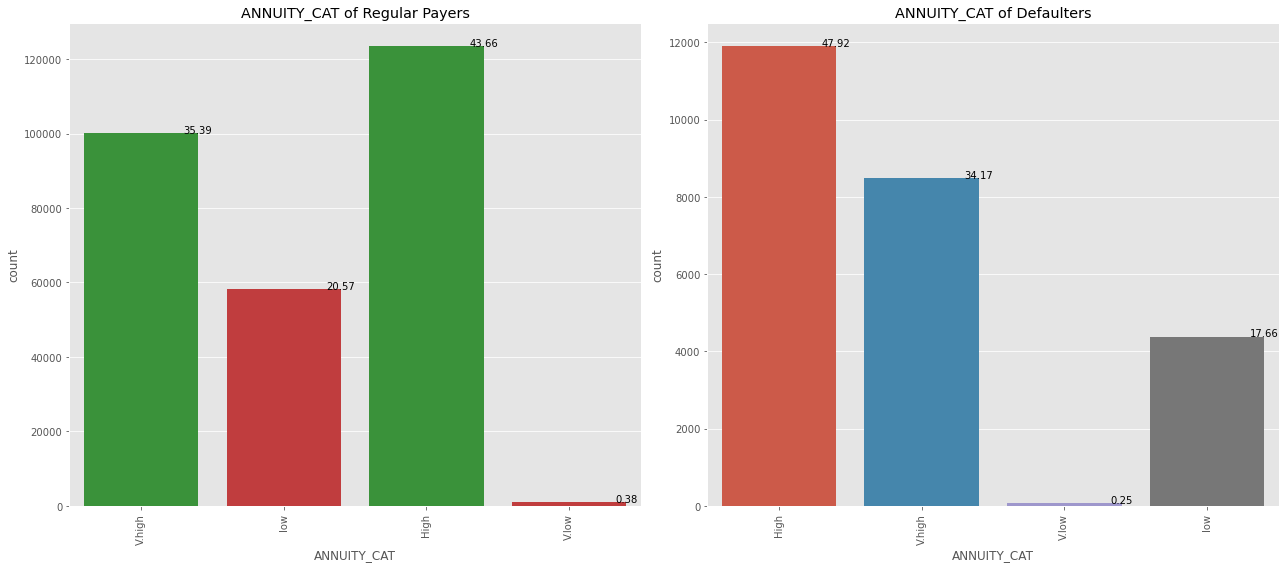

Regular Payer percentage for each class in PERIOD_APPR_PROCESS_START: 

Afternoon    41.4
Morning      40.5
Evening       8.8
Night         1.3
Name: PERIOD_APPR_PROCESS_START, dtype: float64 

*************************
Defaulter percentage for each class in PERIOD_APPR_PROCESS_START: 

Morning      3.8
Afternoon    3.5
Evening      0.6
Night        0.1
Name: PERIOD_APPR_PROCESS_START, dtype: float64 

*************************


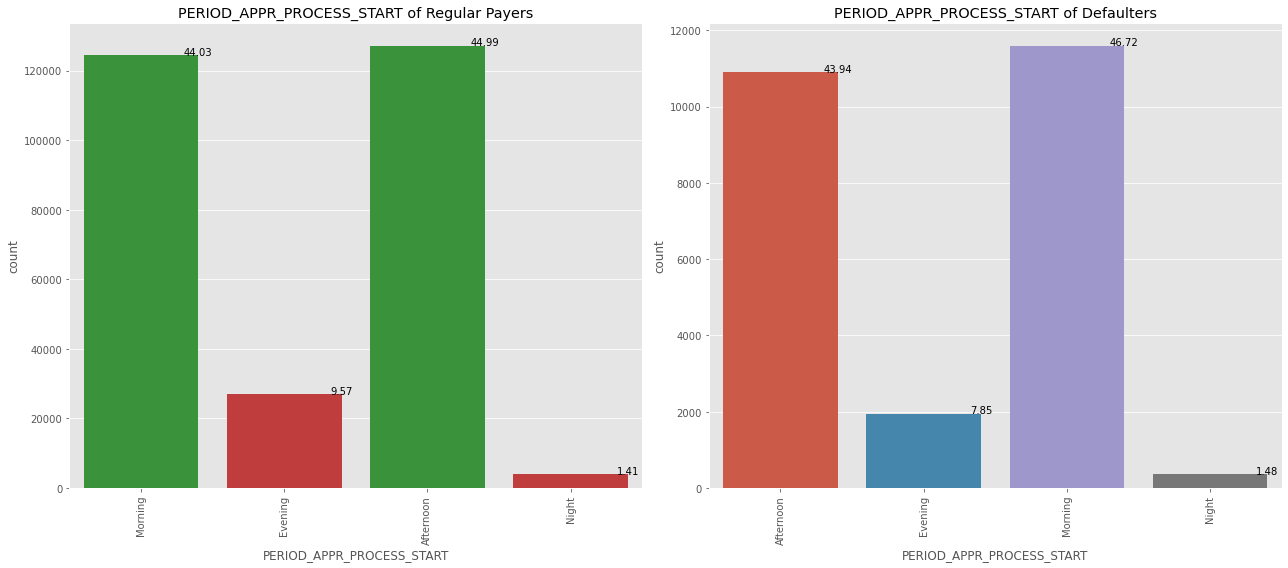

In [66]:
for col in cat_cols:
    categorical_univariant_analysis(col)

In [67]:
df.drop(['WEEKDAY_APPR_PROCESS_START'], axis=1, inplace=True)

In [68]:
df.drop('ORGANIZATION_TYPE', axis= 1, inplace=True)

## Multivariate Column

In [69]:
def bivariante_scatter(x,y, graph_hue, data):
    
    plt.figure(figsize=(18,8))
    plt.subplot(2,2,3)
    
    palette  = ['tab:green', 'tab:red']
    
    fig1 = sns.scatterplot(
        data = data,
        x = x,
        y=y,
        hue = 'DEFAULTER',
        palette= palette
    )
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    
    
    plt.title(f'{y} vs {x} with {graph_hue} hue')
    
    plt.subplot(2,2,2)
    sns.scatterplot(
        data = defaulter_df,
        x = x,
        y=y,
        hue = graph_hue,
    )
    
    plt.title(f'{y} vs {x} for Defaulters ')
    #plt.xticks(rotation = 90,ha = 'right')
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
    
    plt.subplot(2,2,1)
    
    
    sns.scatterplot(
        data = payer_df,
        x = x,
        y=y,
        hue = graph_hue,
    )
    
    plt.title(f'{y} vs {x} forRegular Payers ')
    #plt.xticks(rotation = 90,ha = 'right')
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
    plt.tight_layout()
    
    plt.show()

In [70]:
def bivariate_bar(x,y, graph_hue, data):
    
    plt.figure(figsize= (18,8))
    plt.subplot(1,2,1)
    palette  = ['tab:green', 'tab:red']
    
    sns.barplot(
        data = data,
        x = x,
        y = y,
        hue = graph_hue,
        palette= palette
        
    )
    
    plt.title(f'{y} vs {x} with {graph_hue} hue')
    plt.xticks(rotation = 90,ha = 'right')
    plt.ticklabel_format(style='plain', axis='y')
    
    
    
    plt.subplot(1,2,2)
    sns.barplot(
        data = defaulter_df,
        x = x,
        y = y,
        
    )

    plt.title(f'{y} vs {x} for Defaulters ')
    plt.xticks(rotation = 90,ha = 'right')
    plt.ticklabel_format(style='plain', axis='y')
    plt.tight_layout()
    
    plt.show()

In [71]:
defaulter_df[defaulter_df['CODE_GENDER'] == 'M']['AMT_INCOME_TOTAL'].mean()

177502.08465509152

In [72]:
payer_df[payer_df['CODE_GENDER'] == 'M']['AMT_INCOME_TOTAL'].mean()

195190.41703741366

In the below graph, we can conclude that:
- Femals income is approx 150k for both  defaulters and regular payers
- Males income is approx 175k for defaulters and approx 190k for regular payers
- Therefore we can conclude that Males income is higher than the Femals 

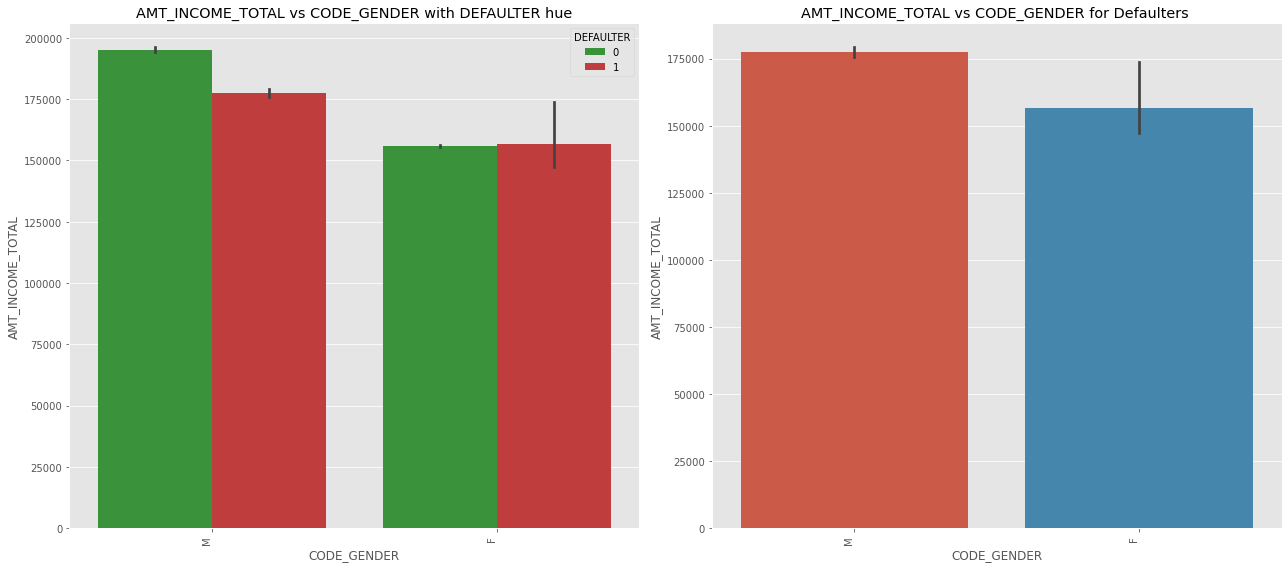

In [73]:
bivariate_bar(x = 'CODE_GENDER', y = 'AMT_INCOME_TOTAL', graph_hue= 'DEFAULTER', data= df)

From the graph below, we can conclude that:

- *Female Defaulters* have been employed for about 5 years, while *Male Defaulter* have been employed about 4 years

- *Female Regular Payers* have been employed for about than 6 and half years, while *Male Regular Payers* have been employed about 5 and half years

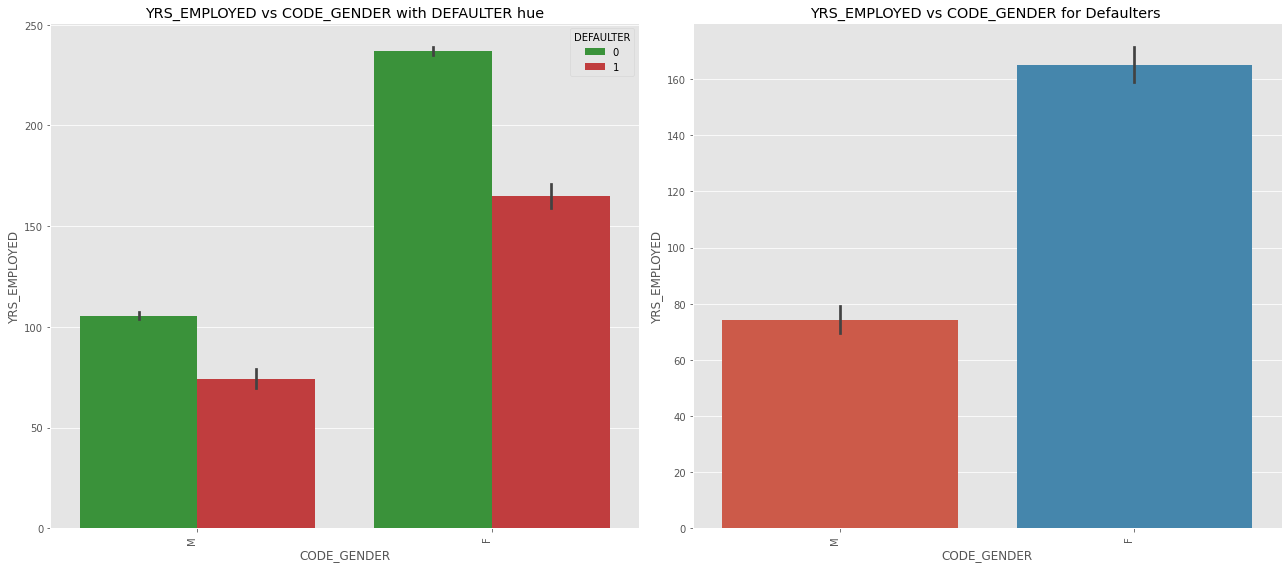

In [74]:
bivariate_bar(x = 'CODE_GENDER', y = 'YRS_EMPLOYED', graph_hue= 'DEFAULTER', data= df)

In [75]:
df.drop(df[df['YRS_EMPLOYED'] == 1014.0].index, inplace=True)

From the graph below, we can conclude that:

- In *high income* category we can see that payers have been employed for more than 6 years
- Regular payers have been employed for 5+ years 
- While defaulters ahve been employed for less than 5 yrs

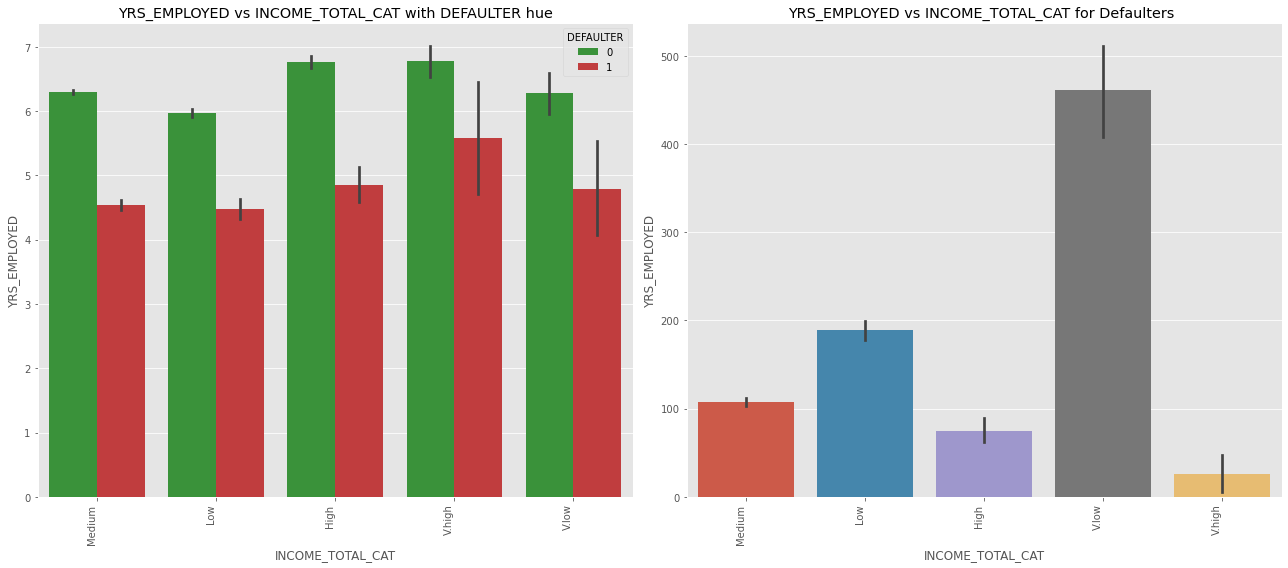

In [76]:
bivariate_bar(x = 'INCOME_TOTAL_CAT', y = 'YRS_EMPLOYED', graph_hue= 'DEFAULTER', data= df)

From the graph below, we can conclude that:

- In *Cash loans* category we can see that they have realtively high credit amount compared to Revolving loans
- Regular Payers that have *cash loans*  have credit approc 650k
-  Regular Payers that have *revolving loans*  have credit amount approx 300k

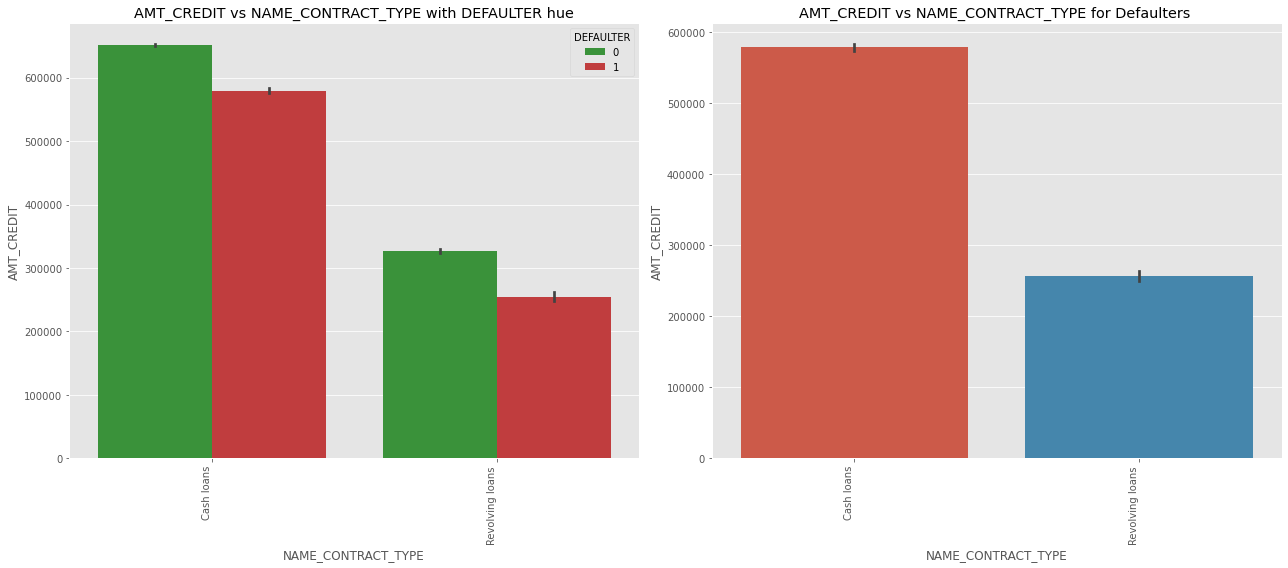

In [77]:
bivariate_bar(x='NAME_CONTRACT_TYPE', y = 'AMT_CREDIT', graph_hue= 'DEFAULTER', data= df)


From the below graph, we can conclude that:
- In V.high credit category Regular Payers have about approx 35k annuity amount
- In Low and V.low credit category both defaulters and regular payers have approx the same annuity amount 

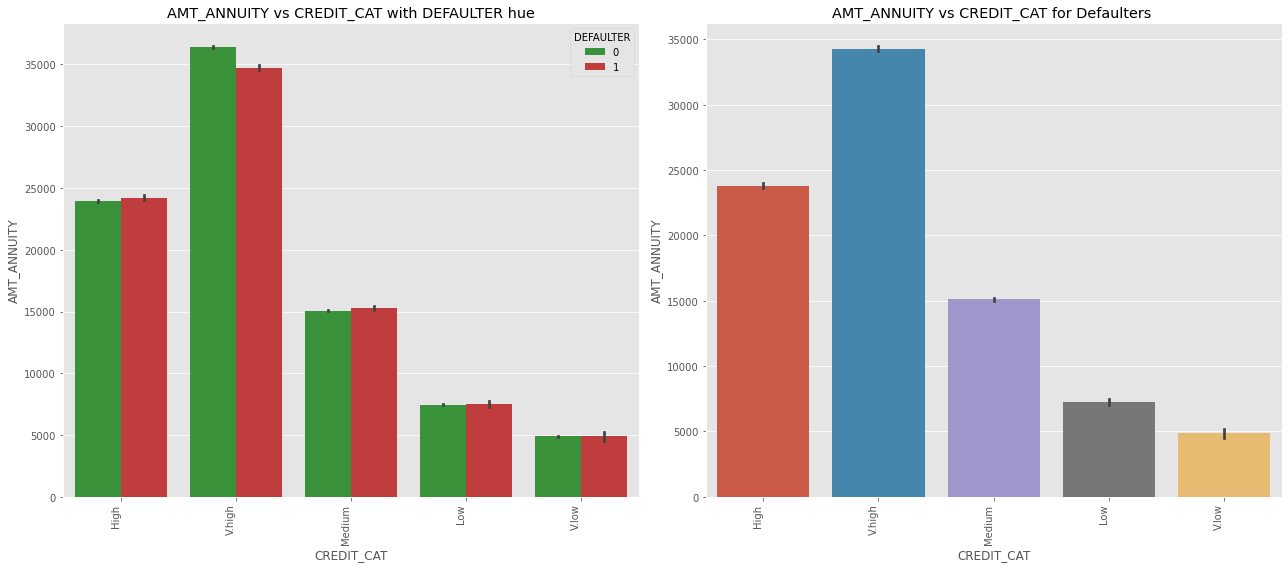

In [78]:
bivariate_bar(x ='CREDIT_CAT', y = 'AMT_ANNUITY', graph_hue= 'DEFAULTER', data= df)

From the below graph, we can conclude that:
- Clients that own a car, they have income amount *greater than* 175k whether they are Defaulters or not
- While clients that don't own a car, they have income amount *less than* 175k whether they are Defaulters or not

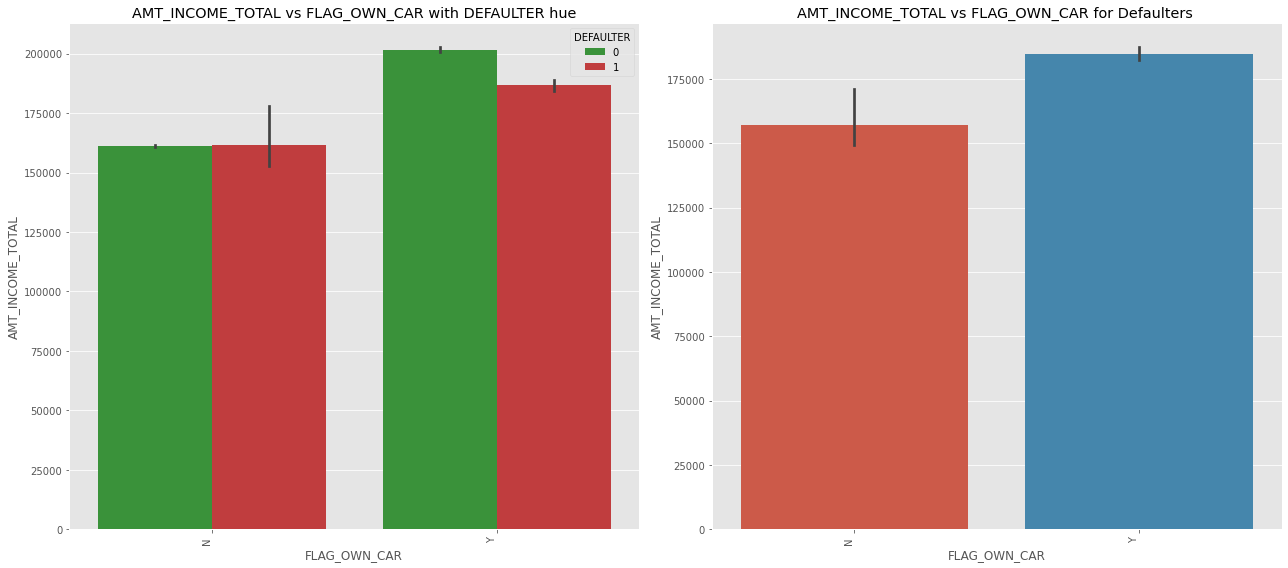

In [79]:
bivariate_bar( x = 'FLAG_OWN_CAR',y ='AMT_INCOME_TOTAL', graph_hue= 'DEFAULTER', data= df)

From the below graph, we can conclude that:
- The Defaulter clients have income amount *less than* 175k whether they own a realty or not 


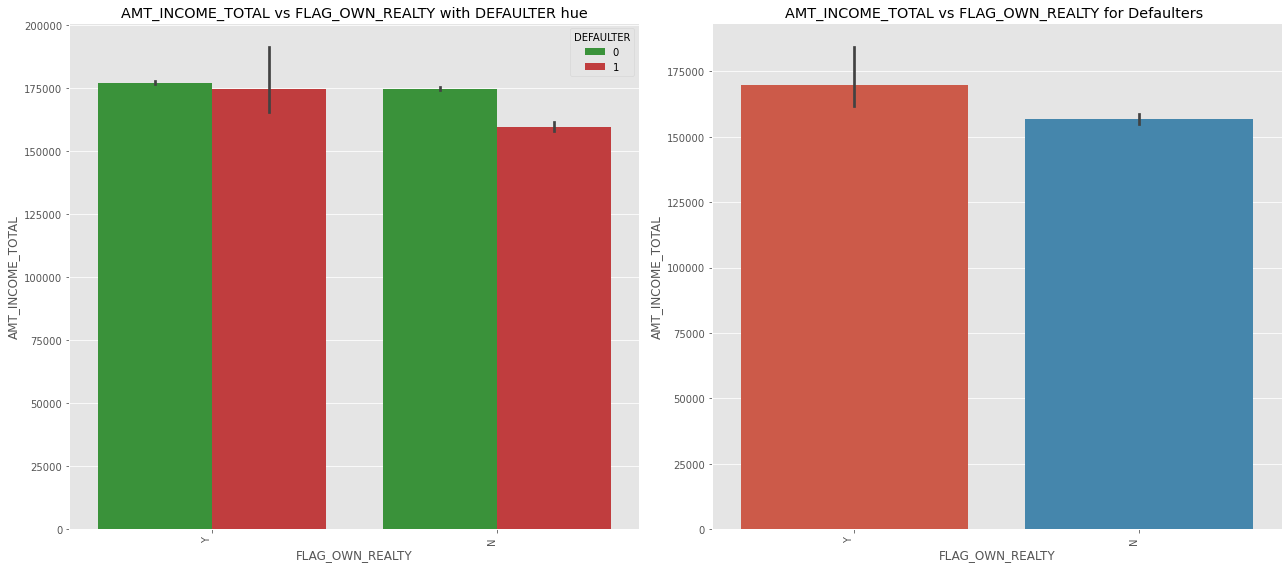

In [80]:
bivariate_bar( x = 'FLAG_OWN_REALTY',y ='AMT_INCOME_TOTAL', graph_hue= 'DEFAULTER', data= df)

In [81]:
df['AMT_REQ_CREDIT_BUREAU_YEAR'].unique()

array([ 1,  0,  2,  4,  5,  3,  8,  6,  9,  7, 10, 11, 16, 12, 23, 15, 14,
       22, 17, 13, 21, 19])

from the below graph, we can conclude that:
- V.high & High income category its region rating doesn't excced 2
- Other categories its region rating excced 2

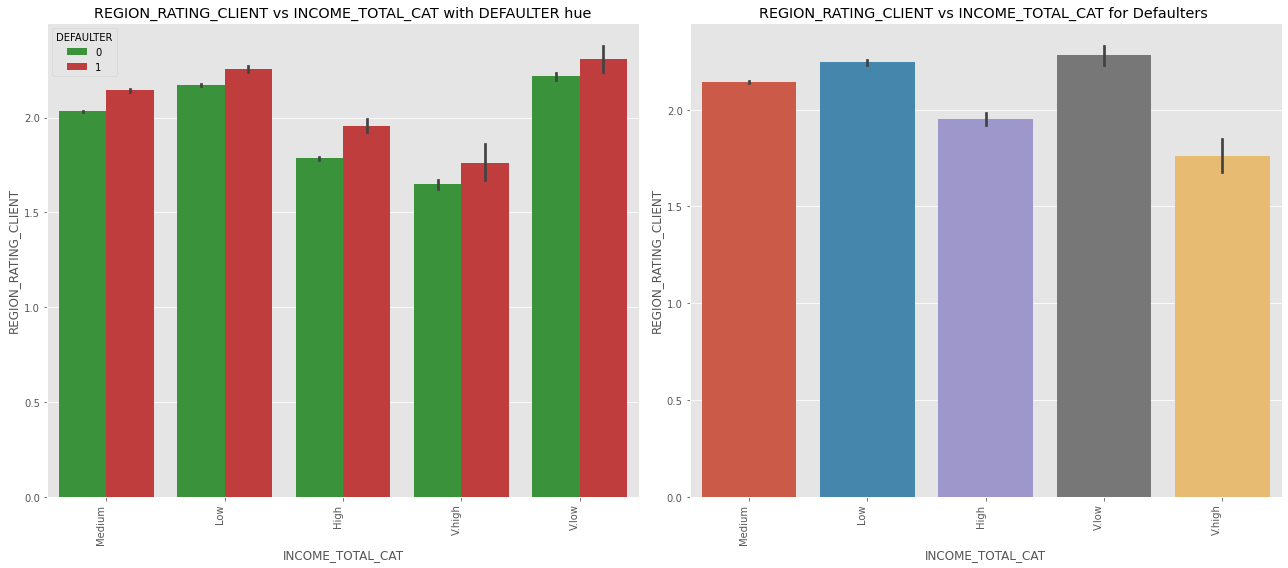

In [82]:

bivariate_bar( x = 'INCOME_TOTAL_CAT',y ='REGION_RATING_CLIENT', graph_hue= 'DEFAULTER', data= df)

From the below graph, we can conclude that:
- *Regular clients* with *Office apparment* housing has the highest  amountt income
- All defulaters average income doesn't exceed 175k, expect for those that have Co-op apartment

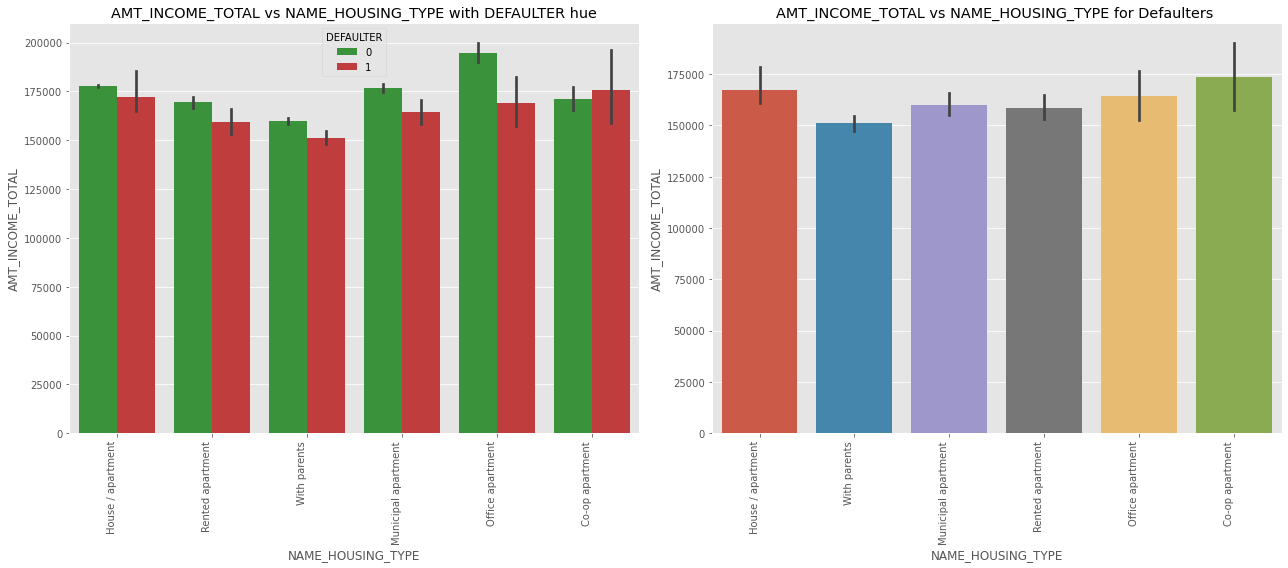

In [83]:
bivariate_bar(x= 'NAME_HOUSING_TYPE', y= 'AMT_INCOME_TOTAL',  graph_hue= 'DEFAULTER', data=df)

From the below graph, we can conclude that:
- Clients with *Office apparment* housing has the highest credit amount
- All *defaulters* credit amount doesn't exceed 600k except for defaulters with *Office apparment* hosunig have averagecredit amount 600k

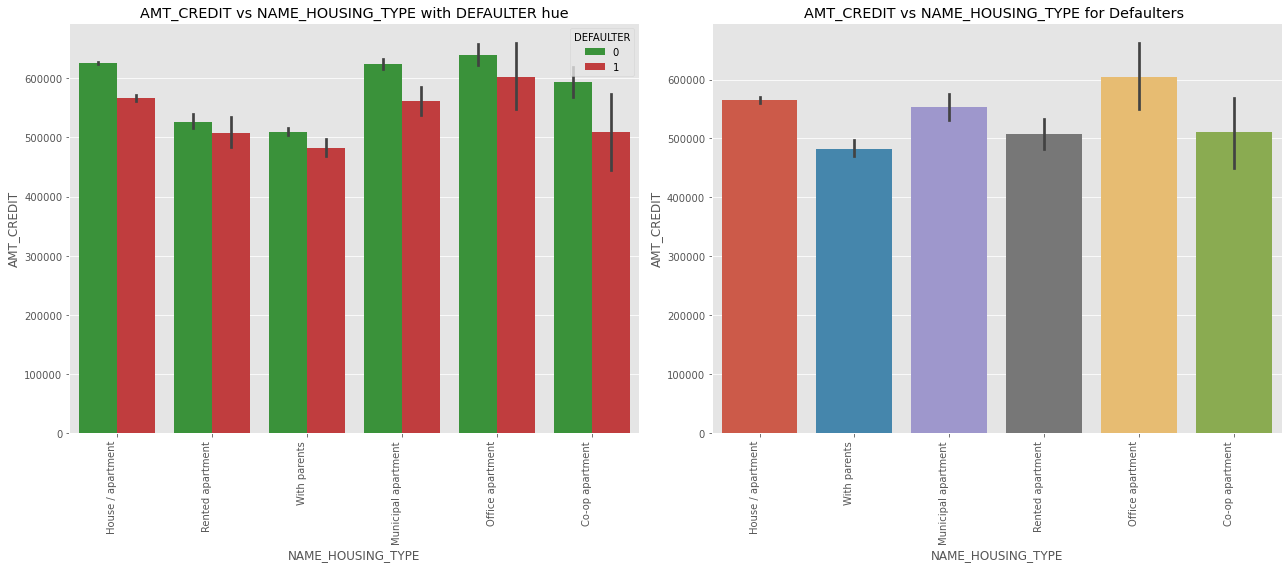

In [84]:
bivariate_bar(x= 'NAME_HOUSING_TYPE', y= 'AMT_CREDIT',  graph_hue= 'DEFAULTER', data=df)

From the below graph we can colcude that:
- Most clients income doesn't excced 2.5M
- Most regular payers credit amount doesn't exceed 3M
- Defaulters income does'nt exceed 200k

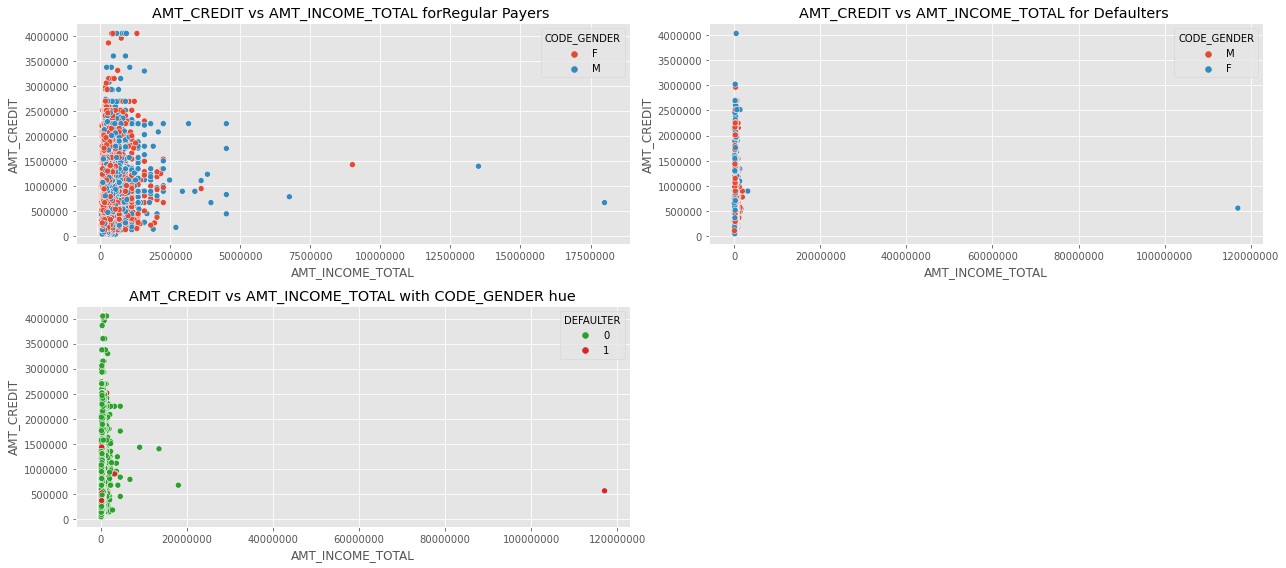

In [85]:
bivariante_scatter(x = 'AMT_INCOME_TOTAL', y = 'AMT_CREDIT', graph_hue='CODE_GENDER',data= df)

from the below graph we can conclude that:
 - Regular payer have many credits that excced 2M, defaulters *don't have* many credits that excced 2M

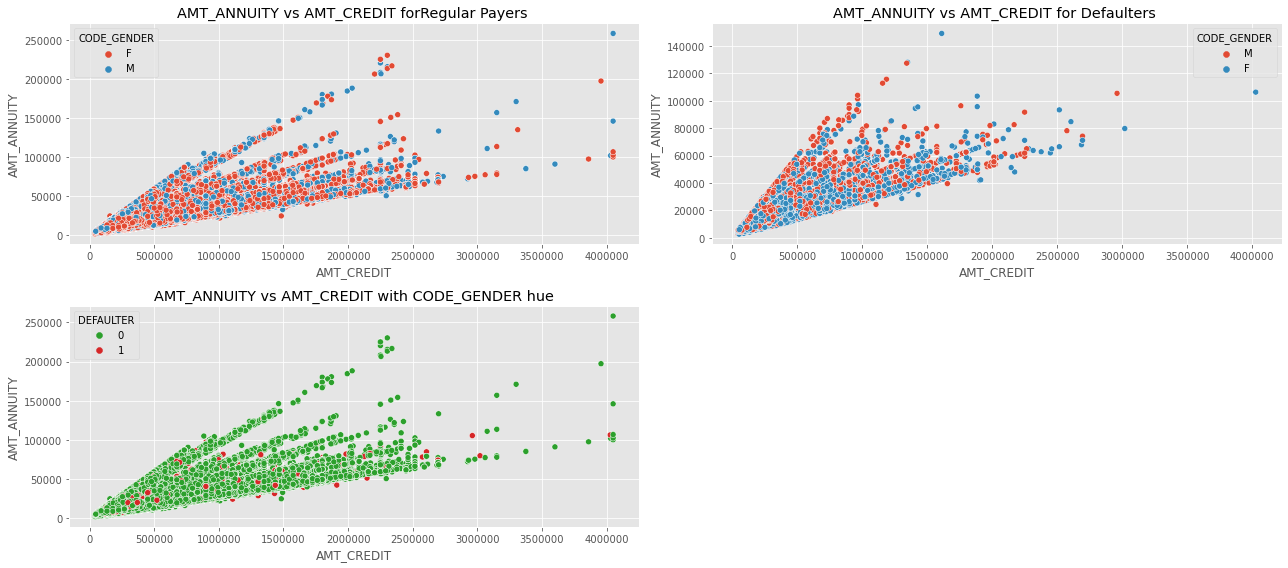

In [86]:
bivariante_scatter(x = 'AMT_CREDIT', y = 'AMT_ANNUITY', graph_hue='CODE_GENDER', data= df)

In [87]:
df.drop(
    ['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',],
    axis = 1,
    inplace = True
        
       )

In [88]:
df.drop(
    ['REGION_RATING_CLIENT_W_CITY','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY',
     'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'MONTHS_LAST_PHONE_CHANGE',
     'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',],
    axis = 1,
    inplace= True
)

In [89]:
df.drop([
    
    'INCOME_TOTAL_CAT',
     'CREDIT_CAT',
     'GOODS_PRICE_CAT',
     'ANNUITY_CAT',
     'PERIOD_APPR_PROCESS_START'
],
    axis = 1,
    inplace= True
)

In [90]:
df.drop('REGION_POPULATION_RELATIVE', axis = 1, inplace= True)

# Merge data frames

In [91]:
prev_df = pd.read_csv('Cleaned Previous DF.csv')
prev_df

,Unnamed: 0,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_previousDF,AMT_ANNUITY_previousDF,AMT_APPLICATION_previousDF,AMT_CREDIT_previousDF,AMT_GOODS_PRICE_previousDF,APPROVED_CONTRACT_previousDF,NAME_PAYMENT_TYPE_previousDF,NAME_CLIENT_TYPE_previousDF,NAME_PORTFOLIO_previousDF,CHANNEL_TYPE_previousDF,CNT_PAYMENT_previousDF,NAME_YIELD_GROUP_previousDF,PRODUCT_COMBINATION_previousDF,AMT_PAYMENT_MONTHLY_previousDF,PAYMENT_MONTHS/YRS_previousDF,AMT_INTEREST_previousDF,INTEREST_RATE_previousDF
0,0,2030495,271877,Consumer loans,1730,17145,17145,17145,1,Cash through the bank,Repeater,POS,Country-wide,12,middle,POS mobile with interest,144,1.0,3615,21.08
1,1,2802425,108129,Cash loans,25188,607500,679671,607500,1,Cash through the bank,Repeater,Cash,Contact center,36,low_action,Cash X-Sell: low,2099,3.0,227097,33.41
2,2,2523466,122040,Cash loans,15060,112500,136444,112500,1,Cash through the bank,Repeater,Cash,Credit and cash offices,12,high,Cash X-Sell: high,1255,1.0,44276,32.45
3,3,2819243,176158,Cash loans,47041,450000,470790,450000,1,Cash through the bank,Repeater,Cash,Credit and cash offices,12,middle,Cash X-Sell: middle,3920,1.0,93702,19.90
4,4,1784265,202054,Cash loans,31924,337500,404055,337500,0,Cash through the bank,Repeater,Cash,Credit and cash offices,24,high,Cash Street: high,2660,2.0,362121,89.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152432,1670209,2300464,352015,Consumer loans,14704,267295,311400,267295,1,Cash through the bank,Refreshed,POS,Stone,30,low_normal,POS industry with interest,1225,2.5,129720,41.66
1152433,1670210,2357031,334635,Consumer loans,6622,87750,64291,87750,1,Cash through the bank,New,POS,Stone,12,middle,POS industry with interest,551,1.0,15173,23.60
1152434,1670211,2659632,249544,Consumer loans,11520,105237,102523,105237,1,Cash through the bank,Repeater,POS,Country-wide,10,low_normal,POS household with interest,960,0.1,12677,12.37
1152435,1670212,2785582,400317,Cash loans,18821,180000,191880,180000,1,Cash through the bank,Repeater,Cash,AP+ (Cash loan),12,low_normal,Cash X-Sell: low,1568,1.0,33972,17.70


In [92]:
prev_df.drop('Unnamed: 0', axis= 1, inplace=True)

In [93]:
prev_df.drop('AMT_APPLICATION_previousDF', axis= 1,inplace=True)

In [94]:
prev_df.drop(['AMT_INTEREST_previousDF', 'PAYMENT_MONTHS/YRS_previousDF'], axis= 1,inplace=True)

In [95]:
prev_df.drop('AMT_PAYMENT_MONTHLY_previousDF', axis= 1,inplace=True)

In [96]:
merge_df = pd.merge(df, prev_df, on = ['SK_ID_CURR'])

In [97]:
merge_df.describe()

,SK_ID_CURR,DEFAULTER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,MONTHS_REGISTRATION,MONTHS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,AMT_REQ_CREDIT_BUREAU_YEAR,YRS_EMPLOYED,SK_ID_PREV,AMT_ANNUITY_previousDF,AMT_CREDIT_previousDF,AMT_GOODS_PRICE_previousDF,APPROVED_CONTRACT_previousDF,CNT_PAYMENT_previousDF,INTEREST_RATE_previousDF
count,791485.000000,791485.000000,791485.000000,7.914850e+05,7.914850e+05,791485.000000,7.914850e+05,791485.000000,791485.000000,791485.000000,791485.0,791485.000000,791485.000000,791485.000000,791485.000000,791485.000000,791485.000000,791485.000000,791485.000000,791485.000000,7.914850e+05,791485.000000,7.914850e+05,7.914850e+05,791485.000000,791485.000000,791485.000000
mean,278421.084817,0.087610,0.501805,1.788591e+05,6.053984e+05,27852.342010,5.444439e+05,41.049511,154.290304,94.227778,1.0,0.999956,0.237727,0.999275,0.289935,0.079353,2.270289,2.056930,2.370924,6.439703,1.912407e+06,16259.435426,2.416967e+05,2.248821e+05,0.815029,17.368338,36.353456
std,102808.372323,0.282727,0.767976,2.147266e+05,3.918569e+05,14137.276913,3.595259e+05,10.154304,108.854752,50.575082,0.0,0.006650,0.425691,0.026920,0.453732,0.270290,0.938565,0.499015,2.013043,6.487946,5.343761e+05,15222.241142,3.539444e+05,3.241834e+05,0.388275,13.771959,39.589078
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1980.000000,4.050000e+04,20.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000001e+06,579.000000,3.456000e+03,3.456000e+03,0.000000,3.000000,0.000000
25%,189363.000000,0.000000,0.000000,1.125000e+05,2.834190e+05,17410.000000,2.475000e+05,33.000000,61.000000,51.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,1.445252e+06,6402.000000,4.941000e+04,5.040000e+04,1.000000,10.000000,14.530000
50%,278816.000000,0.000000,0.000000,1.575000e+05,5.212800e+05,26086.000000,4.500000e+05,41.000000,142.000000,98.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,5.000000,1.907515e+06,11250.000000,1.065060e+05,1.047820e+05,1.000000,12.000000,25.990000
75%,367412.000000,0.000000,1.000000,2.250000e+05,8.248230e+05,35685.000000,6.975000e+05,49.000000,232.000000,140.000000,1.0,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,3.000000,9.000000,2.374729e+06,20542.000000,2.547000e+05,2.250000e+05,1.000000,24.000000,43.850000
max,456255.000000,1.000000,19.000000,1.170000e+08,3.956274e+06,225000.000000,3.825000e+06,70.000000,764.000000,239.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,3.000000,23.000000,49.000000,2.845379e+06,418058.000000,4.509688e+06,5.850000e+06,1.000000,84.000000,3806.250000


In [98]:
merge_df['DEFAULTER'].value_counts()

0    722143
1     69342
Name: DEFAULTER, dtype: int64

In [99]:
merge_df.shape

(791485, 44)

In [100]:
merge_df.drop(['SK_ID_CURR', 'SK_ID_PREV'], axis= 1, inplace= True)

## Explotary Data Analysis

In [101]:
merge_df['DEFAULTER'].value_counts()

0    722143
1     69342
Name: DEFAULTER, dtype: int64

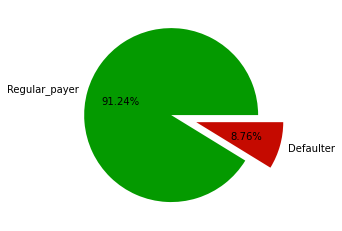

In [102]:
plt.pie(
    merge_df['DEFAULTER'].value_counts(), labels= ['Regular_payer', 'Defaulter'],
    autopct='%.2f%%', 
    colors = ['#049a00','#c50a00'],
    explode = [0, 0.3]
);

In [103]:
defaulter_df = merge_df[merge_df['DEFAULTER'] == 1]

In [104]:
payer_df = merge_df[merge_df['DEFAULTER'] == 0]

In [105]:
def merged_bi_analysis(x, y, graph_hue, palette_list):    
    plt.figure(figsize=(12,8))
    sns.pointplot(
        data= merge_df,
        x= x,
        y= y,
        hue= merge_df['DEFAULTER'],
        palette= palette_list
    )
    plt.ticklabel_format(style='plain', axis='y')
    #plt.ticklabel_format(style='plain', axis='x')
    
    plt.legend()
    plt.xticks(rotation = 90,ha = 'right')
    
    plt.show()

from the below graph, we can conclude that:
- Most *defulaters* in the previous apllication had high credit amount than regulare payers with the same interest/yield group
- both low-normal and low-action groups have client *with average credit amounts higher* than middle and high groups

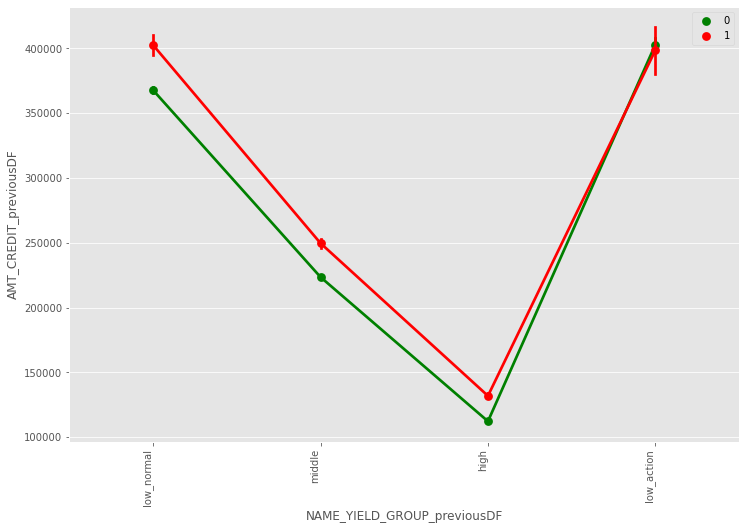

In [106]:
merged_bi_analysis(x= 'NAME_YIELD_GROUP_previousDF', y= 'AMT_CREDIT_previousDF',  graph_hue= 'DEFAULTER',
                   palette_list=['g', 'r'])

from the below graph, we can conclude that:
- Both male and female clinets *defaulted* because their interest rate in the previous application exceeded 40
- While regular payers for both genders their interest rate didn't exceed 36

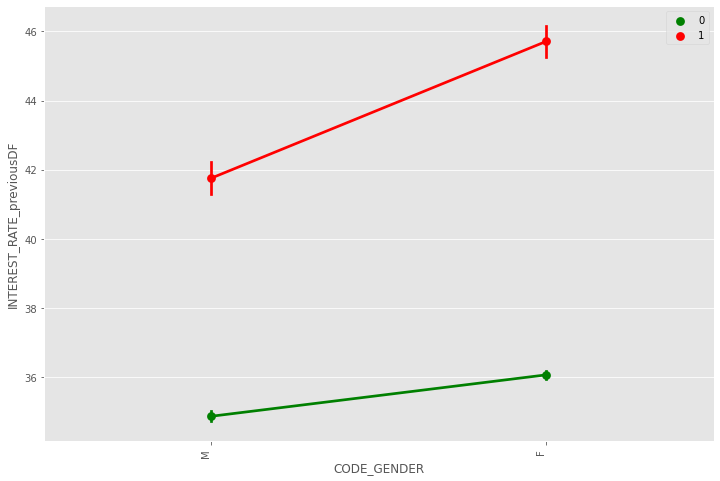

In [107]:
merged_bi_analysis(x= 'CODE_GENDER', y= 'INTEREST_RATE_previousDF',  graph_hue= 'DEFAULTER',
                   palette_list=['g', 'r'])

from the below graph, we can conclude that:
- *Defaulters* have average goods price less than regular payers
- Most cilents that payed through *cashless from the account of the employer* have higher goods price whether they are defaulters or regular payers

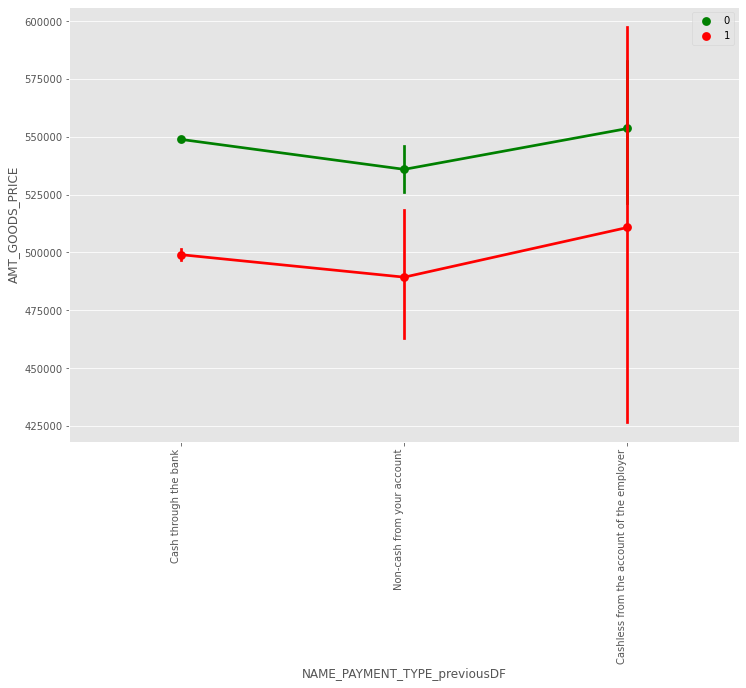

In [108]:
merged_bi_analysis(x = 'NAME_PAYMENT_TYPE_previousDF', y = 'AMT_GOODS_PRICE',  graph_hue= 'DEFAULTER',
                   palette_list=['g', 'r'])

from the below graph we can onclude that:
- *Defaulters* that their income type is Working, Commercial associate and State servant had 20+ count payment in the previous aplication
- All student and Pensioner clients are *Regular payers*
- All Maternity leave clients had defaulted no  matter what the payments count was in the previous aplication

from the below graph, we can conclude that:
- Despite that *defualters* have low average amount credit with low interest/yield gorup

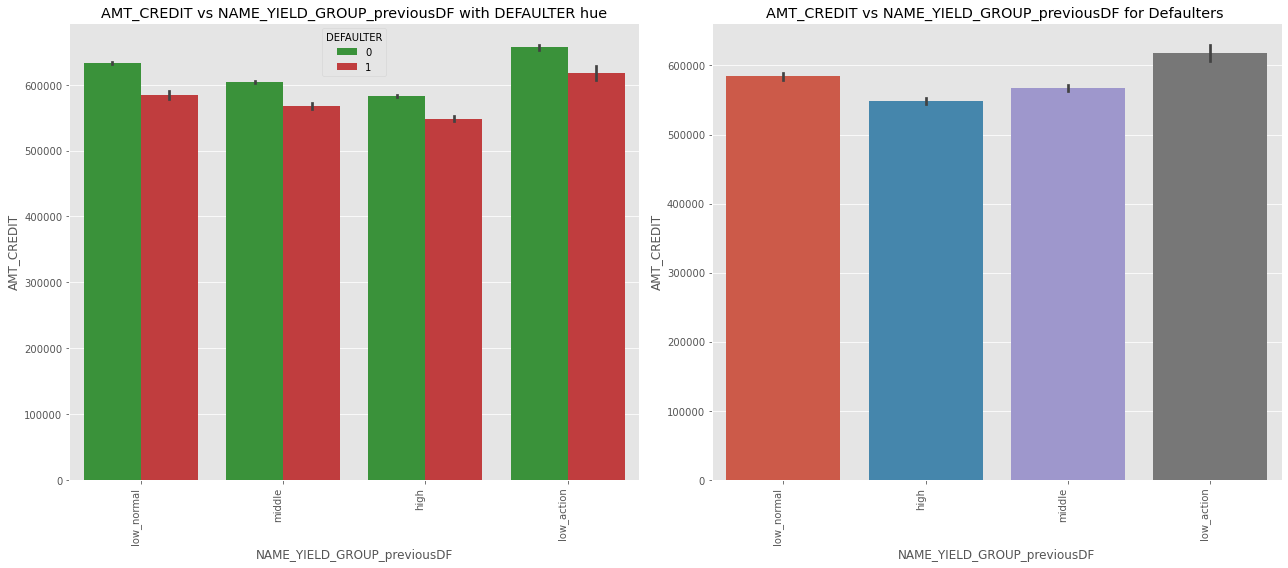

In [110]:
bivariate_bar(x= 'NAME_YIELD_GROUP_previousDF', y= 'AMT_CREDIT',  graph_hue= 'DEFAULTER', data= merge_df)

In [111]:
merge_df['AMT_CREDIT_previousDF'].unique()

array([ 179055, 1035882,  348637, ...,  525730,  292176,  426406],
      dtype=int64)

In [112]:
defaulter_df['AMT_INCOME_TOTAL'].mean()

175275.56212684952

From the below graph, we can conclude that:

- Regular payers with **Office Apartment** house type have the highest *income total* approx 200k
- Defaulter with **Co-op Apartment** have the highest *income total* approx 185k
- Regular payers have higher income total than defaulters with the same *housing type*. Except clients with **Co-op Apartment** housing

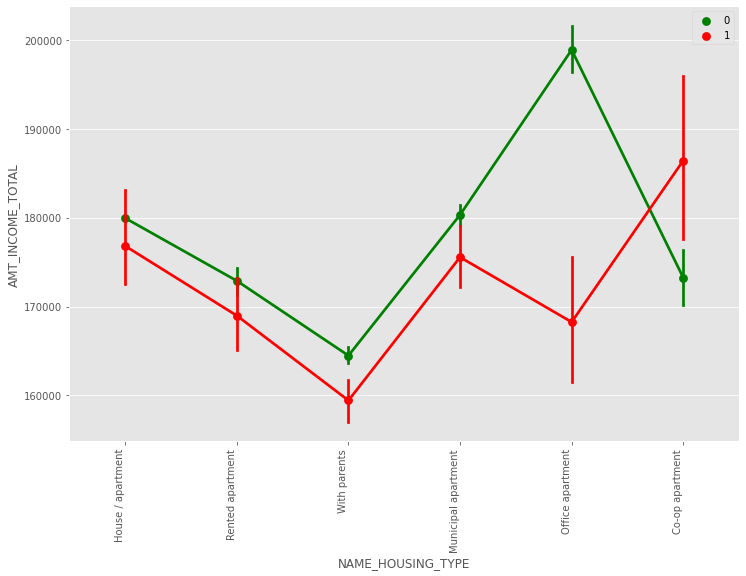

In [113]:
merged_bi_analysis(x= 'NAME_HOUSING_TYPE', y= 'AMT_INCOME_TOTAL',  graph_hue= 'DEFAULTER',  palette_list=['g', 'r'])

From the below graph, we can conclude that:

- Regular payers with *Municipal apartment* has the highest credit amount among other pegular payers with housing types
- All clients average credit amount doesn't exceed 300k 

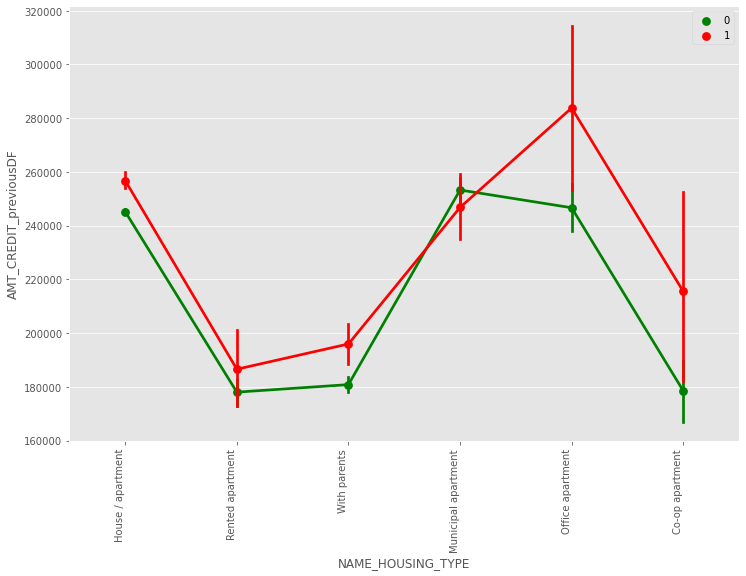

In [114]:
merged_bi_analysis(x= 'NAME_HOUSING_TYPE', y= 'AMT_CREDIT_previousDF',  graph_hue= 'DEFAULTER',  palette_list=['g', 'r'])

In [115]:
merge_df.select_dtypes('object').columns.tolist()

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'NAME_CONTRACT_TYPE_previousDF',
 'NAME_PAYMENT_TYPE_previousDF',
 'NAME_CLIENT_TYPE_previousDF',
 'NAME_PORTFOLIO_previousDF',
 'CHANNEL_TYPE_previousDF',
 'NAME_YIELD_GROUP_previousDF',
 'PRODUCT_COMBINATION_previousDF']

In [116]:
merge_df[merge_df['NAME_CONTRACT_TYPE_previousDF'] == 'Revolving loans']
         

,DEFAULTER,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,MONTHS_REGISTRATION,MONTHS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,AMT_REQ_CREDIT_BUREAU_YEAR,YRS_EMPLOYED,NAME_CONTRACT_TYPE_previousDF,AMT_ANNUITY_previousDF,AMT_CREDIT_previousDF,AMT_GOODS_PRICE_previousDF,APPROVED_CONTRACT_previousDF,NAME_PAYMENT_TYPE_previousDF,NAME_CLIENT_TYPE_previousDF,NAME_PORTFOLIO_previousDF,CHANNEL_TYPE_previousDF,CNT_PAYMENT_previousDF,NAME_YIELD_GROUP_previousDF,PRODUCT_COMBINATION_previousDF,INTEREST_RATE_previousDF
622079,0,Revolving loans,M,Y,N,0,90000,180000,9000,180000,Other_B,Working,Secondary / secondary special,Single / not married,With parents,25,122.0,57,1,1,0,1,0,0,Security staff,1.0,2,4,4.0,Revolving loans,11250,45000,45000,0,Cash through the bank,Repeater,POS,Country-wide,12,middle,Card Street,200.0


In [117]:
merge_df.drop(merge_df[merge_df['NAME_CONTRACT_TYPE_previousDF'] == 'Revolving loans'].index, inplace=True)

In [118]:
merge_df.drop(
    merge_df[(merge_df['NAME_TYPE_SUITE'] == 'Other_B') | (merge_df['NAME_TYPE_SUITE'] == 'Other_A') | (merge_df['NAME_TYPE_SUITE'] == 'Group of people')].index,
    inplace=True
)

## Data Preprocessing 

### Encoding

In [119]:
X= merge_df.drop('DEFAULTER', axis= 1)
y = merge_df['DEFAULTER']

In [120]:
len(merge_df.select_dtypes('object').nunique())

17

In [121]:
merge_df.select_dtypes('object').nunique().sort_values()

NAME_CONTRACT_TYPE                 2
CODE_GENDER                        2
FLAG_OWN_CAR                       2
FLAG_OWN_REALTY                    2
NAME_CONTRACT_TYPE_previousDF      2
NAME_PORTFOLIO_previousDF          3
NAME_CLIENT_TYPE_previousDF        3
NAME_PAYMENT_TYPE_previousDF       3
NAME_TYPE_SUITE                    4
NAME_YIELD_GROUP_previousDF        4
NAME_EDUCATION_TYPE                5
NAME_FAMILY_STATUS                 5
NAME_HOUSING_TYPE                  6
NAME_INCOME_TYPE                   6
CHANNEL_TYPE_previousDF            8
PRODUCT_COMBINATION_previousDF    15
OCCUPATION_TYPE                   18
dtype: int64

In [122]:
merge_df.select_dtypes('object').nunique().sort_values().tail(13).index

Index(['NAME_CONTRACT_TYPE_previousDF', 'NAME_PORTFOLIO_previousDF', 'NAME_CLIENT_TYPE_previousDF', 'NAME_PAYMENT_TYPE_previousDF', 'NAME_TYPE_SUITE', 'NAME_YIELD_GROUP_previousDF', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE', 'CHANNEL_TYPE_previousDF', 'PRODUCT_COMBINATION_previousDF', 'OCCUPATION_TYPE'], dtype='object')

In [123]:
X.shape

(784797, 41)

In [124]:
X = pd.get_dummies(X, 
               columns=[
                   'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                   'NAME_PORTFOLIO_previousDF', 'NAME_CLIENT_TYPE_previousDF', 'NAME_PAYMENT_TYPE_previousDF',
                   'NAME_CONTRACT_TYPE_previousDF'
])

In [125]:
X.drop(['NAME_PAYMENT_TYPE_previousDF_Cashless from the account of the employer'], axis=1, inplace=True)


In [126]:
for i in X.select_dtypes('object').nunique().sort_values().tail(12).index:
    print(i,'\n')
    print(X[i].value_counts())
    print('_'*20)

NAME_TYPE_SUITE 

Unaccompanied      648111
Family             101361
Spouse, partner     28423
Children             6902
Name: NAME_TYPE_SUITE, dtype: int64
____________________
NAME_YIELD_GROUP_previousDF 

middle        259231
high          255662
low_normal    206990
low_action     62914
Name: NAME_YIELD_GROUP_previousDF, dtype: int64
____________________
NAME_EDUCATION_TYPE 

Secondary / secondary special    558585
Higher education                 189574
Incomplete higher                 29265
Lower secondary                    6990
Academic degree                     383
Name: NAME_EDUCATION_TYPE, dtype: int64
____________________
NAME_FAMILY_STATUS 

Married                 519299
Single / not married    107157
Civil marriage           84825
Separated                49747
Widow                    23769
Name: NAME_FAMILY_STATUS, dtype: int64
____________________
NAME_INCOME_TYPE 

Working                 498985
Commercial associate    218466
State servant            67264
Pension

In [127]:
label_enc= LabelEncoder()

In [128]:
label_enc.fit_transform(X[i])

array([8, 3, 3, ..., 8, 8, 8])

In [129]:
for i in X.select_dtypes('object').nunique().sort_values().tail(12).index:
    X[i] = label_enc.fit_transform(X[i])


In [130]:
merge_df['NAME_YIELD_GROUP_previousDF'].value_counts()

middle        259231
high          255662
low_normal    206990
low_action     62914
Name: NAME_YIELD_GROUP_previousDF, dtype: int64

In [131]:
for i in ['NAME_YIELD_GROUP_previousDF', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE',
          'NAME_HOUSING_TYPE', 'NAME_TYPE_SUITE', 'CHANNEL_TYPE_previousDF', 'PRODUCT_COMBINATION_previousDF',
          'OCCUPATION_TYPE']:
    print(i,'\n')
    print(X[i].value_counts())
    print('_'*20)

NAME_YIELD_GROUP_previousDF 

3    259231
0    255662
2    206990
1     62914
Name: NAME_YIELD_GROUP_previousDF, dtype: int64
____________________
NAME_EDUCATION_TYPE 

4    558585
1    189574
2     29265
3      6990
0       383
Name: NAME_EDUCATION_TYPE, dtype: int64
____________________
NAME_FAMILY_STATUS 

1    519299
3    107157
0     84825
2     49747
4     23769
Name: NAME_FAMILY_STATUS, dtype: int64
____________________
NAME_INCOME_TYPE 

5    498985
0    218466
3     67264
2        53
4        18
1        11
Name: NAME_INCOME_TYPE, dtype: int64
____________________
NAME_HOUSING_TYPE 

1    691706
5     41848
2     28505
4     13011
3      7028
0      2699
Name: NAME_HOUSING_TYPE, dtype: int64
____________________
NAME_TYPE_SUITE 

3    648111
1    101361
2     28423
0      6902
Name: NAME_TYPE_SUITE, dtype: int64
____________________
CHANNEL_TYPE_previousDF 

4    317291
5    210634
7    139342
6     71917
0     23732
3     17580
2      3949
1       352
Name: CHANNEL_TYPE_previ

In [132]:
X.drop('PRODUCT_COMBINATION_previousDF', axis= 1, inplace= True)

In [133]:
X.drop(
    ['FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE'],
    axis= 1,
    inplace= True
)

In [134]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.3)

In [135]:
print(X_train.shape)
print(X_test.shape)

(549357, 48)
(235440, 48)


### Feature Selection

In [136]:
mutual_info = mutual_info_classif(X_train,y_train)

In [137]:

mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

FLAG_MOBIL                                                 0.113404
NAME_PAYMENT_TYPE_previousDF_Cash through the bank         0.112463
NAME_CONTRACT_TYPE_Cash loans                              0.096026
APPROVED_CONTRACT_previousDF                               0.079347
NAME_TYPE_SUITE                                            0.078733
NAME_EDUCATION_TYPE                                        0.075474
NAME_INCOME_TYPE                                           0.072734
NAME_HOUSING_TYPE                                          0.070359
REGION_RATING_CLIENT                                       0.068275
FLAG_OWN_REALTY_Y                                          0.057482
NAME_CLIENT_TYPE_previousDF_Repeater                       0.049750
NAME_CONTRACT_TYPE_previousDF_Consumer loans               0.048407
CODE_GENDER_F                                              0.047893
NAME_PORTFOLIO_previousDF_POS                              0.047891
NAME_FAMILY_STATUS                              

<AxesSubplot:>

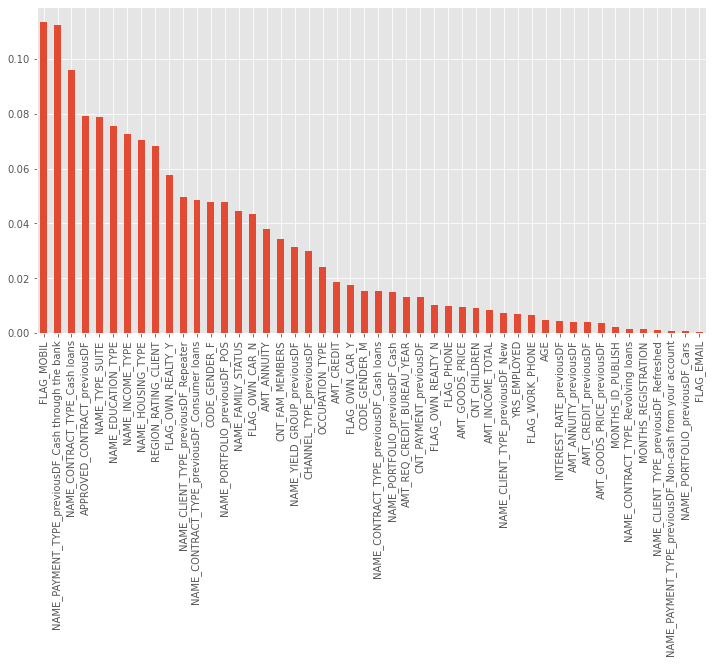

In [138]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(12, 6))


In [139]:
X_train.drop(['NAME_PAYMENT_TYPE_previousDF_Non-cash from your account'], axis=1, inplace=True)
X_test.drop(['NAME_PAYMENT_TYPE_previousDF_Non-cash from your account'], axis=1, inplace=True)

In [140]:
merge_df['FLAG_OWN_CAR'].value_counts()

N    483077
Y    301720
Name: FLAG_OWN_CAR, dtype: int64

In [141]:
X_train.shape

(549357, 47)

In [142]:
merge_df['NAME_PAYMENT_TYPE_previousDF'].value_counts()

Cash through the bank                        778503
Non-cash from your account                     5557
Cashless from the account of the employer       737
Name: NAME_PAYMENT_TYPE_previousDF, dtype: int64

In [143]:
X_train.columns

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'AGE', 'MONTHS_REGISTRATION', 'MONTHS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'YRS_EMPLOYED', 'AMT_ANNUITY_previousDF', 'AMT_CREDIT_previousDF', 'AMT_GOODS_PRICE_previousDF', 'APPROVED_CONTRACT_previousDF', 'CHANNEL_TYPE_previousDF', 'CNT_PAYMENT_previousDF', 'NAME_YIELD_GROUP_previousDF', 'INTEREST_RATE_previousDF', 'NAME_CONTRACT_TYPE_Cash loans', 'NAME_CONTRACT_TYPE_Revolving loans', 'CODE_GENDER_F', 'CODE_GENDER_M', 'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_N', 'FLAG_OWN_REALTY_Y', 'NAME_PORTFOLIO_previousDF_Cars', 'NAME_PORTFOLIO_previousDF_Cash', 'NAME_PORTFOLIO_previousDF_POS', 'NAME_CLIENT_TYPE_previousDF_New',
       'NAME_CLIENT_TYPE_previousDF_Refr

### Feature Scaling

In [144]:
sc = StandardScaler()

pickle.dump(sc, 
            open('Standard Scalar.pkl', 'wb')
           )


## Imbalance Data

In [146]:
from imblearn.over_sampling import SMOTE

In [147]:
smote = SMOTE()

In [148]:
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

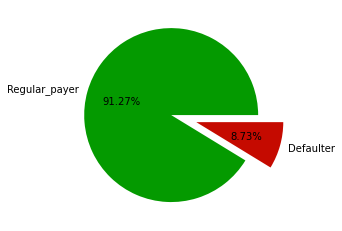

In [149]:
plt.pie(
    y_train.value_counts(), labels= ['Regular_payer', 'Defaulter'],
    autopct='%.2f%%', 
    colors = ['#049a00','#c50a00'],
    explode = [0, 0.3]
);

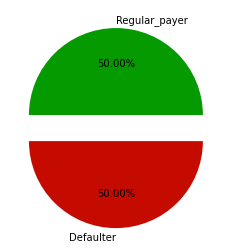

In [150]:
plt.pie(
    y_train_res.value_counts(), labels= ['Regular_payer', 'Defaulter'],
    autopct='%.2f%%', 
    colors = ['#049a00','#c50a00'],
    explode = [0, 0.3]
);

In [151]:
y_train_res.value_counts()

0    501408
1    501408
Name: DEFAULTER, dtype: int64

### Model Selection

In [152]:
classifiers = [
    {'name': 'Logistic Regression', 'classifier': LogisticRegression(), 'params': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}},
    {'name': 'AdaBoost', 'classifier': AdaBoostClassifier(), 'params': {'n_estimators': [50, 100, 200]}},
    {'name': 'XGBoost', 'classifier': xgb.XGBClassifier(), 'params': {'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200]}},
    {'name': 'Decision Tree', 'classifier': DecisionTreeClassifier(), 'params': {'max_depth': [3, 5, 7]}},
    
]    

for clf in classifiers:
    print(f"\t\tPerforming grid search for {clf['name']}: \n\n")
    grid_search = GridSearchCV(clf['classifier'], clf['params'], cv=5)
    grid_search.fit(X_train_res, y_train_res)
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Training accuracy: {(grid_search.best_score_)*100}")
    print(f"Test accuracy: {(grid_search.score(X_test, y_test))*100}\n")
    y_pred = grid_search.predict(X_test)
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)
    counts = pd.Series(y_pred).value_counts()
    print('Count of Predicted Approved:', counts[1])
    print('Count of Predicted Decliend:', counts[0])
    print('-' *60)

In [154]:
XGB = xgb.XGBClassifier(max_depth = 7, n_estimators = 200)
XGB.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [155]:
y_pred = XGB.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [156]:
print(XGB.score(X_test, y_test) * 100)

92.32415902140673


In [157]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)
counts = pd.Series(y_pred).value_counts()
print('Count of Predicted Defaulter:', counts[1])
print('Count of Predicted Regular Payer:', counts[0])


Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    214645
           1       0.84      0.16      0.27     20795

    accuracy                           0.92    235440
   macro avg       0.88      0.58      0.62    235440
weighted avg       0.92      0.92      0.90    235440

Count of Predicted Defaulter: 4031
Count of Predicted Regular Payer: 231409


# df preprocessing and Model Selection

## Data PreProcessing

In [158]:
X = df.drop(['DEFAULTER', 'SK_ID_CURR'],axis = 1)
y = df['DEFAULTER']

In [159]:
X.select_dtypes(include='object').nunique().head(6)

NAME_CONTRACT_TYPE    2
CODE_GENDER           2
FLAG_OWN_CAR          2
FLAG_OWN_REALTY       2
NAME_TYPE_SUITE       7
NAME_INCOME_TYPE      7
dtype: int64

In [160]:
X.select_dtypes(include='object').nunique().head(4)

NAME_CONTRACT_TYPE    2
CODE_GENDER           2
FLAG_OWN_CAR          2
FLAG_OWN_REALTY       2
dtype: int64

In [161]:
X.select_dtypes(include='object').nunique().head(6)

NAME_CONTRACT_TYPE    2
CODE_GENDER           2
FLAG_OWN_CAR          2
FLAG_OWN_REALTY       2
NAME_TYPE_SUITE       7
NAME_INCOME_TYPE      7
dtype: int64

In [162]:
list(X.select_dtypes(include='object').nunique().head(4).index)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

In [163]:
X = pd.get_dummies(X, columns= ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY'])

In [164]:
df.drop(X[X['NAME_FAMILY_STATUS'] == 'Unknown'].index, inplace= True)

In [165]:
X.select_dtypes('object').columns.tolist()

['NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE']

In [166]:
for i in X.select_dtypes('object').columns.tolist():
    print(i,'\n')
    print(X[i].value_counts())
    print('_'*20)

NAME_TYPE_SUITE 

Unaccompanied      206114
Family              31659
Spouse, partner      9663
Children             2250
Other_B              1473
Other_A               762
Group of people       216
Name: NAME_TYPE_SUITE, dtype: int64
____________________
NAME_INCOME_TYPE 

Working                 158774
Commercial associate     71617
State servant            21703
Student                     18
Pensioner                   10
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64
____________________
NAME_EDUCATION_TYPE 

Secondary / secondary special    173286
Higher education                  66669
Incomplete higher                  9757
Lower secondary                    2287
Academic degree                     138
Name: NAME_EDUCATION_TYPE, dtype: int64
____________________
NAME_FAMILY_STATUS 

Married                 163914
Single / not married     39316
Civil marriage           26197
Separated                16000
Widow                

In [167]:
label_enc = LabelEncoder()

In [168]:
X['OCCUPATION_TYPE'] = label_enc.fit_transform(X['OCCUPATION_TYPE'])

In [169]:
X['NAME_TYPE_SUITE'] = label_enc.fit_transform(X['NAME_TYPE_SUITE'])

In [170]:
X['NAME_INCOME_TYPE'] = label_enc.fit_transform(X['NAME_INCOME_TYPE'])

In [171]:
X['NAME_FAMILY_STATUS'] = label_enc.fit_transform(X['NAME_FAMILY_STATUS'])

In [172]:
X['NAME_EDUCATION_TYPE'] = label_enc.fit_transform(X['NAME_EDUCATION_TYPE'])

In [173]:

X['NAME_HOUSING_TYPE'] = label_enc.fit_transform(X['NAME_HOUSING_TYPE'])

In [174]:
list_ = ['NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE']

In [175]:
for i in list_:
    print(i,'\n')
    print(X[i].value_counts())
    print('_'*20)

NAME_TYPE_SUITE 

6    206114
1     31659
5      9663
0      2250
4      1473
3       762
2       216
Name: NAME_TYPE_SUITE, dtype: int64
____________________
NAME_INCOME_TYPE 

6    158774
1     71617
4     21703
5        18
3        10
0        10
2         5
Name: NAME_INCOME_TYPE, dtype: int64
____________________
NAME_EDUCATION_TYPE 

4    173286
1     66669
2      9757
3      2287
0       138
Name: NAME_EDUCATION_TYPE, dtype: int64
____________________
NAME_FAMILY_STATUS 

1    163914
3     39316
0     26197
2     16000
5      6708
4         2
Name: NAME_FAMILY_STATUS, dtype: int64
____________________
NAME_HOUSING_TYPE 

1    220483
5     14621
2      9050
4      4676
3      2301
0      1006
Name: NAME_HOUSING_TYPE, dtype: int64
____________________
OCCUPATION_TYPE 

8     96205
14    32102
3     27570
10    21371
4     18603
6     11380
0      9813
11     8537
16     6721
2      5946
1      4651
12     2652
9      2093
17     1348
15     1305
13      751
5       563
7       526

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [177]:
y_train.value_counts()

0    161122
1     15373
Name: DEFAULTER, dtype: int64

## Feature Selection

In [178]:

mutual_info = mutual_info_classif(X_train,y_train)

In [179]:

mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

FLAG_MOBIL                            0.036494
FLAG_CONT_MOBILE                      0.036264
FLAG_EMP_PHONE                        0.035762
NAME_CONTRACT_TYPE_Cash loans         0.029665
NAME_EDUCATION_TYPE                   0.025166
NAME_TYPE_SUITE                       0.024254
REGION_RATING_CLIENT                  0.022765
NAME_HOUSING_TYPE                     0.021388
NAME_INCOME_TYPE                      0.019488
FLAG_OWN_REALTY_Y                     0.016723
NAME_FAMILY_STATUS                    0.015161
CODE_GENDER_F                         0.014903
FLAG_OWN_CAR_N                        0.012764
AMT_ANNUITY                           0.012288
CNT_FAM_MEMBERS                       0.009935
OCCUPATION_TYPE                       0.009734
AMT_CREDIT                            0.008460
CODE_GENDER_M                         0.006110
FLAG_OWN_CAR_Y                        0.005470
AMT_GOODS_PRICE                       0.005122
YRS_EMPLOYED                          0.004908
AMT_REQ_CREDI

In [180]:
X_train.drop(['MONTHS_REGISTRATION'], axis=1, inplace=True)

In [181]:
X_test.drop(['MONTHS_REGISTRATION'], axis=1, inplace=True)

<AxesSubplot:>

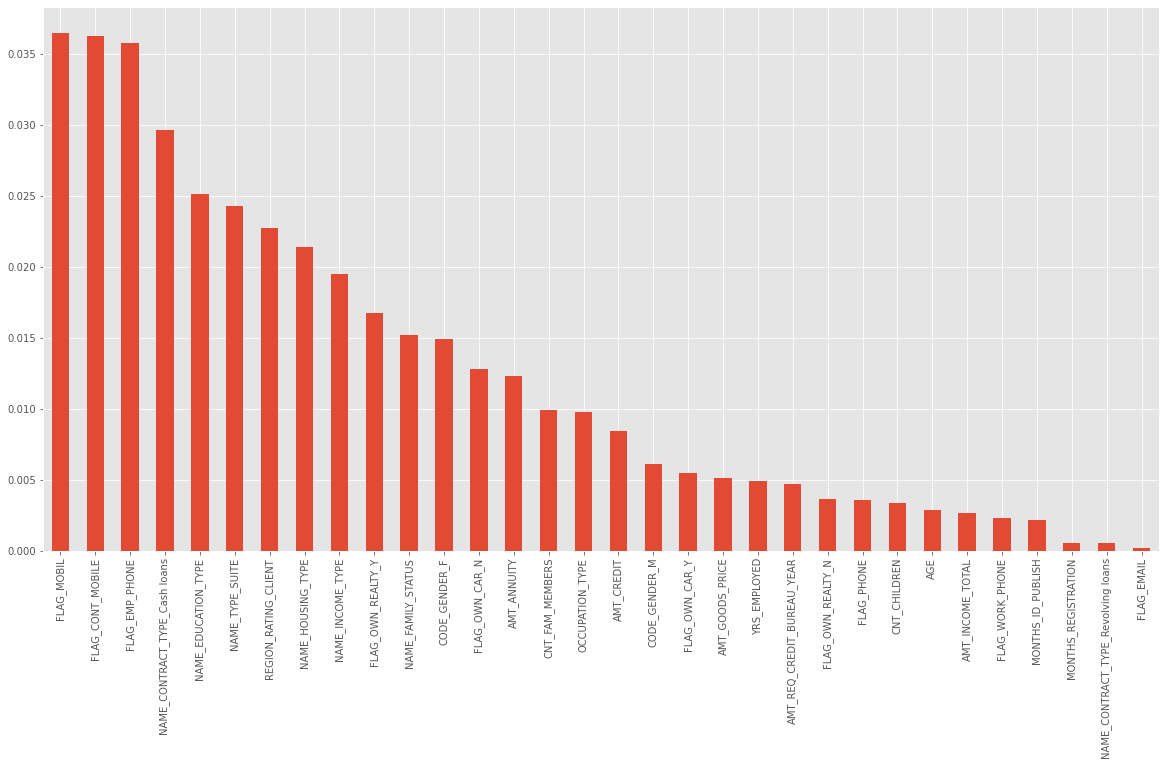

In [182]:
mutual_info.sort_values(ascending = False).plot.bar(figsize = (20,10))

In [183]:
X_test.shape

(75642, 31)

In [184]:
X_train.drop(['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL'], axis=1, inplace=True)
X_test.drop(['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL'], axis=1, inplace=True)

In [185]:
X_train.drop(['FLAG_CONT_MOBILE'], axis=1, inplace=True)

In [186]:
X_test.drop(['FLAG_CONT_MOBILE'], axis=1, inplace=True)

## Feature Scaling

In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)

In [ ]:
X_test = sc.fit_transform(X_test)

# Imbalance Data

In [187]:
from imblearn.over_sampling import SMOTE

In [188]:
smote = SMOTE()

In [189]:
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

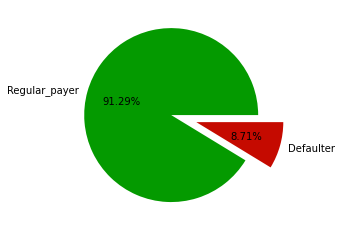

In [190]:
plt.pie(
    y_train.value_counts(), labels= ['Regular_payer', 'Defaulter'],
    autopct='%.2f%%', 
    colors = ['#049a00','#c50a00'],
    explode = [0, 0.3]
);

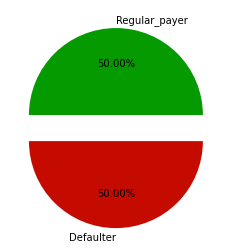

In [191]:
plt.pie(
    y_train_res.value_counts(), labels= ['Regular_payer', 'Defaulter'],
    autopct='%.2f%%', 
    colors = ['#049a00','#c50a00'],
    explode = [0, 0.3]
);

# Model selection

In [192]:
classifiers = [
    #{'name': 'Logistic Regression', 'classifier': LogisticRegression(), 'params': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}},
    {'name': 'Decision Tree', 'classifier': DecisionTreeClassifier(), 'params': {'max_depth': [3, 5, 7]}},
    #{'name': 'AdaBoost', 'classifier': AdaBoostClassifier(), 'params': {'n_estimators': [50, 100, 200]}},
    {'name': 'XGBoost', 'classifier': xgb.XGBClassifier(), 'params': {'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200]}},
]    

In [ ]:
for clf in classifiers:
    print(f"\t\tPerforming grid search for {clf['name']}: \n\n")
    grid_search = GridSearchCV(clf['classifier'], clf['params'], cv=5)
    grid_search.fit(X_train_res, y_train_res)
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Training accuracy: {(grid_search.best_score_)*100}")
    print(f"Test accuracy: {(grid_search.score(X_test, y_test))*100}\n")
    y_pred = grid_search.predict(X_test)
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)
    counts = pd.Series(y_pred).value_counts()
    print('Count of Predicted Approved:', counts[1])
    print('Count of Predicted Decliend:', counts[0])
    print('-' *60)

In [193]:
XGB = xgb.XGBClassifier(max_depth = 7, n_estimators = 200)
XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [194]:
y_pred = XGB.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [195]:
print(XGB.score(X_test, y_test) * 100)

91.3209592554401


In [196]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)
counts = pd.Series(y_pred).value_counts()
print('Count of Predicted Defaulter:', counts[1])
print('Count of Predicted Regular Payer:', counts[0])

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     69180
           1       0.17      0.00      0.01      6462

    accuracy                           0.91     75642
   macro avg       0.54      0.50      0.48     75642
weighted avg       0.85      0.91      0.87     75642

Count of Predicted Defaulter: 155
Count of Predicted Regular Payer: 75487


## Saving model

In [199]:
len(X_train_res.columns)

25

In [204]:
pickle.dump(
    XGB,
    open('app_df xgbmodel.pkl', 'wb')
)

In [201]:
pickle.dump(
    X_train,
    open('app_df features.pkl', 'wb')
)

In [ ]:
X.drop('MONTHS_REGISTRATION', axis=1, inplace=True)

In [ ]:
X['CNT_FAM_MEMBERS']

In [203]:
len(X_train.columns)

25